# <h1><center>**`Employee Attrition Problem`**</center></h1>

### `Dataset Desciption`

The dataset folder contains the following files:

**train_dataset.csv** = 1000000 x 8

**train_salaries.csv** = 1000000 x 2

**test_dataset.csv** =  1000000 x 8

Columns Provided in the Dataset

1. **jobId** - Unique ID that indicates the employee
2. **companyId** - Unique ID that idicates the company
3. **jobType** - Shows which post the employee is working for the company
4. **degree** - shows which degree is completed by the employee
5. **major** - shows the field in which the employee is specialised in
6. **industry** - show the industry in which the employee is working
7. **yearsExperience** - years of working experience the employee is having
8. **milesFromMetropolis** - distance in miles between the comapny and his house
9. **salary** - salary given to the employee.
eg. 250 indicates 2,50,000 in dollars

In [1]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from tqdm import tqdm

In [2]:
# Load the train_dataset, train_salaries, test_dataset(pass your file path from drive)

train_data = pd.read_csv('C:/Users/navne/AML PROJECT/Final/Dataset/train_dataset.csv') 
train_data_salaries = pd.read_csv('C:/Users/navne/AML PROJECT/Final/Dataset/train_salaries.csv') 
test_data = pd.read_csv('C:/Users/navne/AML PROJECT/Final/Dataset/test_dataset.csv') 

In [3]:
# check the train data
train_data.head()



,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [4]:
# check the train data salarie
train_data_salaries.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [5]:
# check the test data
test_data.head()



,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


In [6]:
# Adding salary data to train_dataset using merge on jobId
train_data = pd.merge(train_data,train_data_salaries,on='jobId')
train_data


,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163
...,...,...,...,...,...,...,...,...,...
999995,JOB1362685407682,COMP56,VICE_PRESIDENT,BACHELORS,CHEMISTRY,HEALTH,19,94,88
999996,JOB1362685407683,COMP24,CTO,HIGH_SCHOOL,NONE,FINANCE,12,35,160
999997,JOB1362685407684,COMP23,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION,16,81,64
999998,JOB1362685407685,COMP3,CFO,MASTERS,NONE,HEALTH,6,5,149


In [7]:
#salaries less that 30 can be removed as such a such salary per month is not expected
train_data = train_data[train_data['salary']>30] 

#  EDA

## Identifying the number of features or columns

## Know all the names of the columns¶

In [8]:
# get all column names
train_data.columns



Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis', 'salary'],
      dtype='object')

## Knows more about the data in the columns like data type it contains and total samples of each

In [9]:
# Check which columns are having categorical, numerical or boolean values of train_dataset
train_data.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 997548 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   jobId                997548 non-null  object
 1   companyId            997548 non-null  object
 2   jobType              997548 non-null  object
 3   degree               997548 non-null  object
 4   major                997548 non-null  object
 5   industry             997548 non-null  object
 6   yearsExperience      997548 non-null  int64 
 7   milesFromMetropolis  997548 non-null  int64 
 8   salary               997548 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 76.1+ MB


In [10]:
# Check which columns are having categorical, numerical or boolean values of test_dataset
test_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


1. After checking the Dtypes of all the columns 
    1. object - String values
    1. int64 - Numerical values
1. There are more String values than the numerical values in the dataset

## Know more mathematical relations of the dataset like count, min, max values, standarad deviation values, mean and different percentile values

In [11]:
# For train_dataset
# For more information on the dataset like the total count in all the columns
# min, max values and more information of the respective columns  

train_data.describe()


,yearsExperience,milesFromMetropolis,salary
count,997548.000000,997548.000000,997548.000000
mean,12.015214,49.458372,116.280462
std,7.204992,28.863518,38.512936
min,0.000000,0.000000,31.000000
25%,6.000000,24.000000,89.000000
50%,12.000000,49.000000,114.000000
75%,18.000000,74.000000,141.000000
max,24.000000,99.000000,301.000000


In [12]:
# for test_dataset
# For more information on the dataset like the total count in all the columns
# min, max values and more information of the respective columns
test_data.describe()



,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000
mean,12.002104,49.526414
std,7.213179,28.889713
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


## Get the total number of samples in the dataset using the len() function

In [13]:
# len of train and test dataset
print('train data length: ',len(train_data))
print('test data length: ',len(test_data))


train data length:  997548
test data length:  1000000


## Get unique values

In [14]:
# get how many unique values are in train_dataset
for x in train_data.columns:
    print(x,':',len(train_data[x].unique()))

jobId : 997548
companyId : 63
jobType : 8
degree : 5
major : 9
industry : 7
yearsExperience : 25
milesFromMetropolis : 100
salary : 265


In [15]:
# get how many unique values are in test_dataset
for x in test_data.columns:
    print(x,':',len(test_data[x].unique()))


jobId : 1000000
companyId : 63
jobType : 8
degree : 5
major : 9
industry : 7
yearsExperience : 25
milesFromMetropolis : 100


## Counting the total number of missing values¶

In [16]:
# Check for missing values in all the columnns of the train_dataset
train_data.isnull().sum()



jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
salary                 0
dtype: int64

In [17]:
 # Check for missing values in all the columnns of the test_dataset
test_data.isnull().sum()



jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64

## By the observation gather from the train_data.info(), we can know there are no missing values in the train and test dataset

## removing 'jobId' and 'companyId' data from train and test data

In [18]:
# drop jobId and companyId from train_dataset
train_data = train_data.drop(['jobId','companyId'], axis = 1)
train_data




,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,CFO,MASTERS,MATH,HEALTH,10,83,130
1,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163
...,...,...,...,...,...,...,...
999995,VICE_PRESIDENT,BACHELORS,CHEMISTRY,HEALTH,19,94,88
999996,CTO,HIGH_SCHOOL,NONE,FINANCE,12,35,160
999997,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION,16,81,64
999998,CFO,MASTERS,NONE,HEALTH,6,5,149


In [19]:
# drop jobId and companyId from test_dataset
test_data = test_data.drop(['jobId','companyId'], axis = 1)
test_data


,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JUNIOR,NONE,NONE,AUTO,20,47
2,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44
...,...,...,...,...,...,...
999995,VICE_PRESIDENT,BACHELORS,MATH,OIL,14,3
999996,MANAGER,NONE,NONE,HEALTH,20,67
999997,JANITOR,NONE,NONE,OIL,1,91
999998,CTO,DOCTORAL,MATH,OIL,14,63


## Check for categorical columns in the dataset

By observing the train_data.info() cell, we can biforcate the datatype for which the object is the values which indicates those are the categorical columns. This dataset has more categorical columns than numerical values

1. jobType
2. degree
3. major
4. industry

In [20]:
# creating two empty list to store categorical column names and numerical column names respectively
categorical_list = []
var_list = []
# looping on whole dataset for geting list of categorical data column name
for x in train_data.columns:
    if train_data[x].dtype == 'object':
        categorical_list.append(x)
    elif train_data[x].dtype == 'int64':
        var_list.append(x)
    elif train_data[x].dtype == 'float64':
        var_list.append(x)



## Correlation Matrix

In [21]:
# Correlation metrix using pandas
corr = train_data.corr()

corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,yearsExperience,milesFromMetropolis,salary
yearsExperience,1.00,0.00,0.37
milesFromMetropolis,0.00,1.00,-0.29
salary,0.37,-0.29,1.00


## From above correlation matrix:
1. yearsExperience and salary are positively correlated.

2. yearsExperience and milesFromMetropolis have no correlation.

3. milesFromMetropolis and salary are weakly negatively correlated.

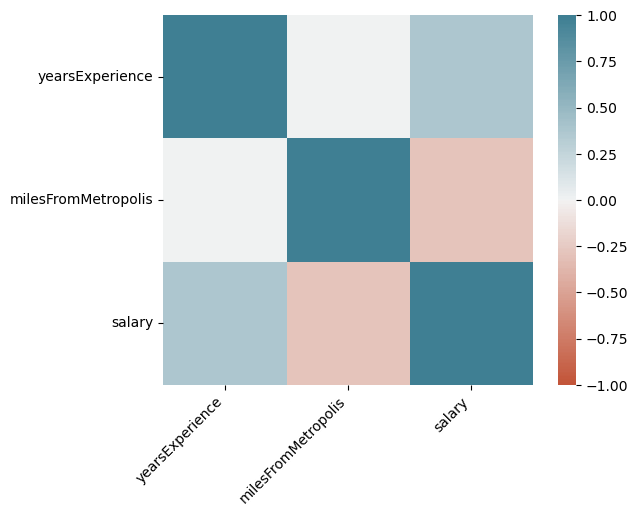

In [22]:
# Correlation metrix using seaborn
ax = sns.heatmap(corr,
                 vmin=-1, vmax=1, center=0,
                 cmap=sns.diverging_palette(20, 220, n=200),
                 square=True
                )
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);




## Chi-square Test

In [23]:
# import necessary libraries for chi-square test
from scipy.stats import chi2_contingency
from scipy.stats import chi2

def perform_chi_square_test(var_1,var_2):
    
    #Contingency Table
    contingency_table = pd.crosstab(train_data[var_1],train_data[var_2])
    
    #Observed Values
    observed_values = contingency_table.values 
    
    #Expected Values
    b = chi2_contingency(contingency_table)
    expected_values = b[3]
    
    #Degree of Freedom
    no_of_rows = len(contingency_table.iloc[0:,0])
    no_of_columns = len(contingency_table.iloc[0,0:])
    degree_f=(no_of_rows-1)*(no_of_columns-1)
    print("Degree of Freedom: ",degree_f)
    
    #Significance Level 5%
    alpha = 0.05 
    print('Significance level: ',alpha)
    
    #chi-square statistic
    chi_square = sum([(o-e)**2./e for o,e in zip(observed_values,expected_values)]) 
    chi_square_statistic = chi_square[0]+chi_square[1]
    print("chi-square statistic: ",chi_square_statistic)
    
    #critical_value
    critical_value=chi2.ppf(q=1-alpha,df=degree_f)
    print('critical_value:',critical_value)
    
    #p-value
    p_value = 1-chi2.cdf(x=chi_square_statistic,df=degree_f)

    print('p-value:',p_value)
          
    if chi_square_statistic>=critical_value:
        print("Reject H0,There is a relationship between 2 categorical variables")
    else:
        print("Retain H0,There is no relationship between 2 categorical variables")

    if p_value<=alpha:
        print("Reject H0,There is a relationship between 2 categorical variables")
    else:
        print("Retain H0,There is no relationship between 2 categorical variables")

In [24]:
# looping on categorical data list and use function for performing chi-square test on columns from dataset
for x in categorical_list:
    for i in categorical_list:
        if i != x:
            print('chi-square test on: ',x,' ',i,'\n')
            perform_chi_square_test(x,i)
            print('-------------------------------------------------------------------\n')

chi-square test on:  jobType   degree 

Degree of Freedom:  28
Significance level:  0.05
chi-square statistic:  49153.86411257831
critical_value: 41.33713815142739
p-value: 0.0
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables
-------------------------------------------------------------------

chi-square test on:  jobType   major 

Degree of Freedom:  56
Significance level:  0.05
chi-square statistic:  16381.915810303108
critical_value: 74.46832415930936
p-value: 0.0
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables
-------------------------------------------------------------------

chi-square test on:  jobType   industry 

Degree of Freedom:  42
Significance level:  0.05
chi-square statistic:  100.30610291761408
critical_value: 58.12403768086803
p-value: 1.1246299327360987e-06
Reject H0,There is a relationship between 2 c

From above chi-square test:

- correlated variables:

  1. jobtype and degree
  2. jobtype and major
  3. degree and major


## Scatter Plot

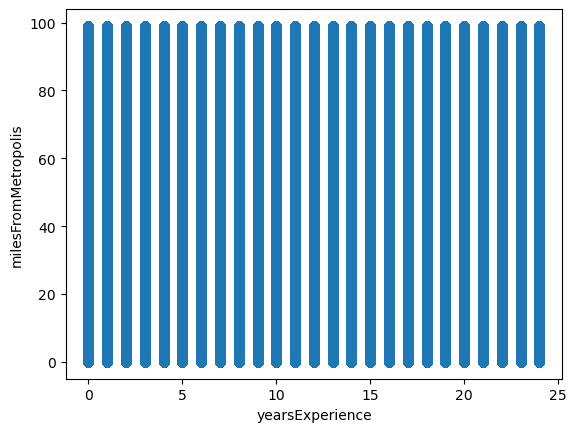

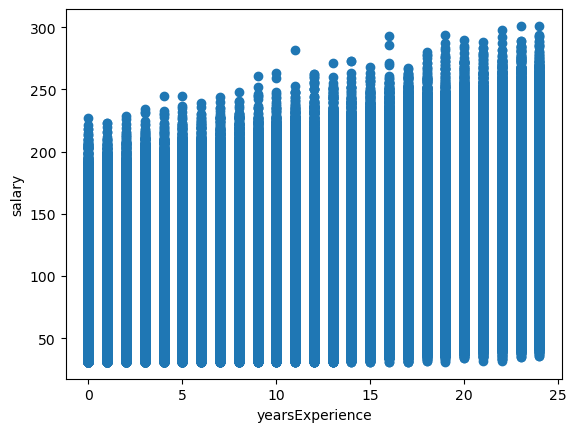

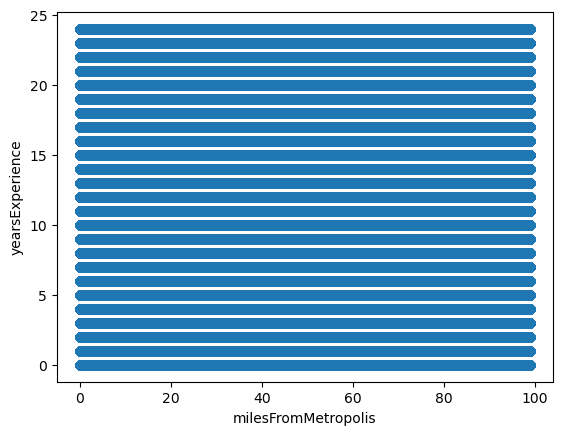

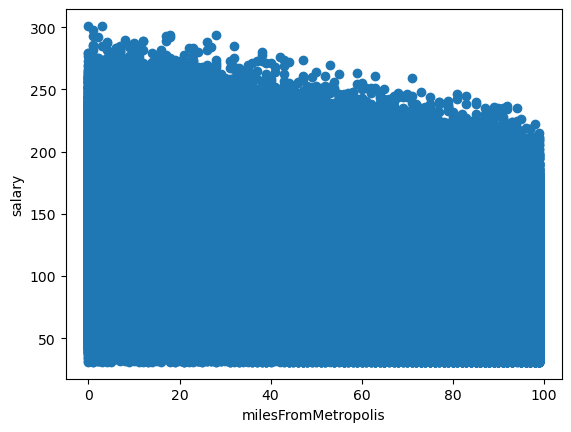

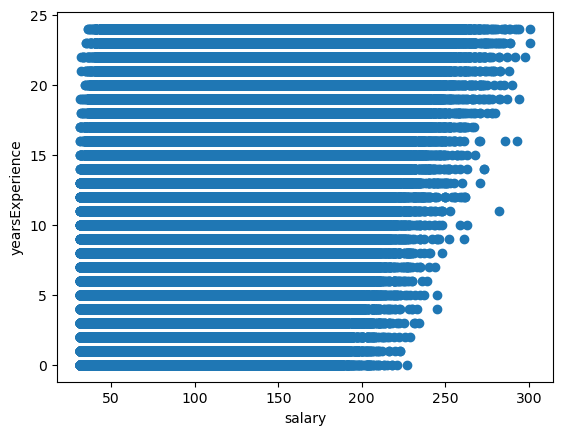

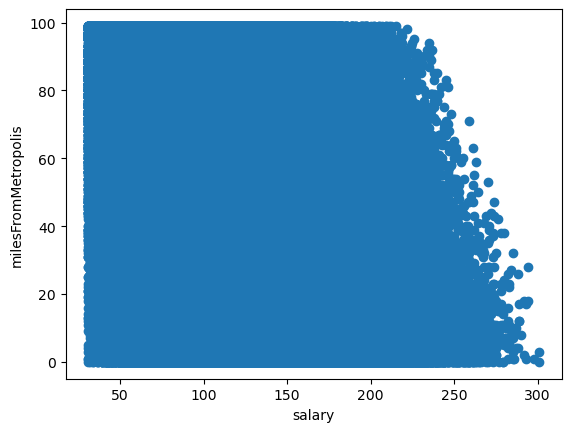

In [25]:
# Scatter plot using matplotlib 
# create function for ploting scatterplot between two columns of dataset
def plot_scatter(x, y):
    plt.figure()
    plt.xlabel(x)
    plt.ylabel(y)
    plt.scatter(train_data[x], train_data[y])
    plt.show()

    
    # Loop through the different columns 
for i in var_list:
    for j in var_list:
        if i != j:
            plot_scatter(i, j)

From above scatter plot

1. Increase in value on yearsExperience axis results in increase of values on salary axis. That is they are positively correlated.

2. Increase in value on 
milesFromMetropolis axis results in decrease of values on salary axis. That is they are negatively correlated.

2. There is no change in values of yearExperience vs milesFromMetropolis graph. That is there is no correlation between these variables.

## Histogram

array([[<AxesSubplot:title={'center':'yearsExperience'}>,
        <AxesSubplot:title={'center':'milesFromMetropolis'}>],
       [<AxesSubplot:title={'center':'salary'}>, <AxesSubplot:>]],
      dtype=object)

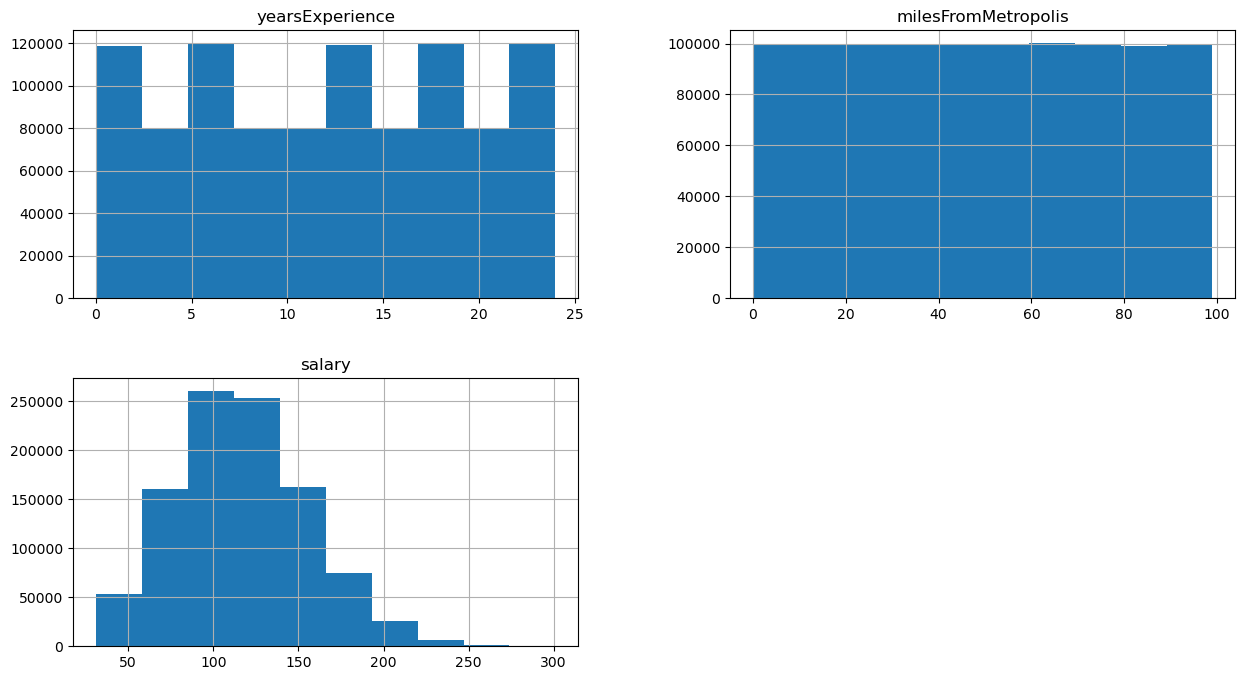

In [26]:
# Histogram using pandas 
train_data.hist(figsize=(15, 8))



From the above histogram

1. yearsExperience data distribution is symmetric.

2. milesFromMetropolis data distribution is symmetric.

3. salary data distribution is symmetric, unimodel (it has only one peak in distribution)


## Box Plot

<AxesSubplot:>

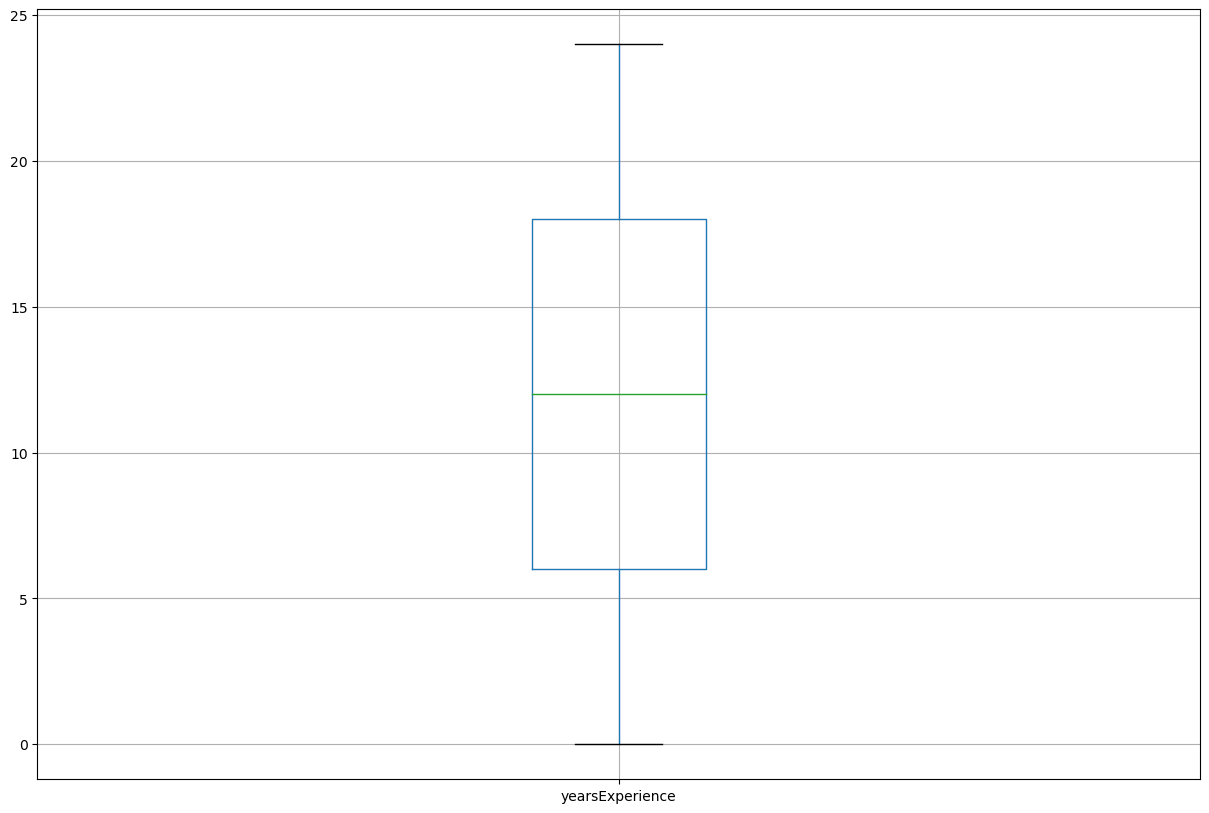

In [27]:
# box plot using pandas 
# box plot for yearsExperience column
train_data.boxplot(column='yearsExperience' , figsize=(15, 10))





from above box plot graph:

- yearsExperience
  1. 25% of employees from dataset has yearExperience of between range 0 to 6.
  2. 25% of employee has yearExperience between range 6 to 12.
  3. 25% of employee has yearExperience between range 12 to 18.
  4. 25% of employee has yearExperience between range 18 to 24

<AxesSubplot:>

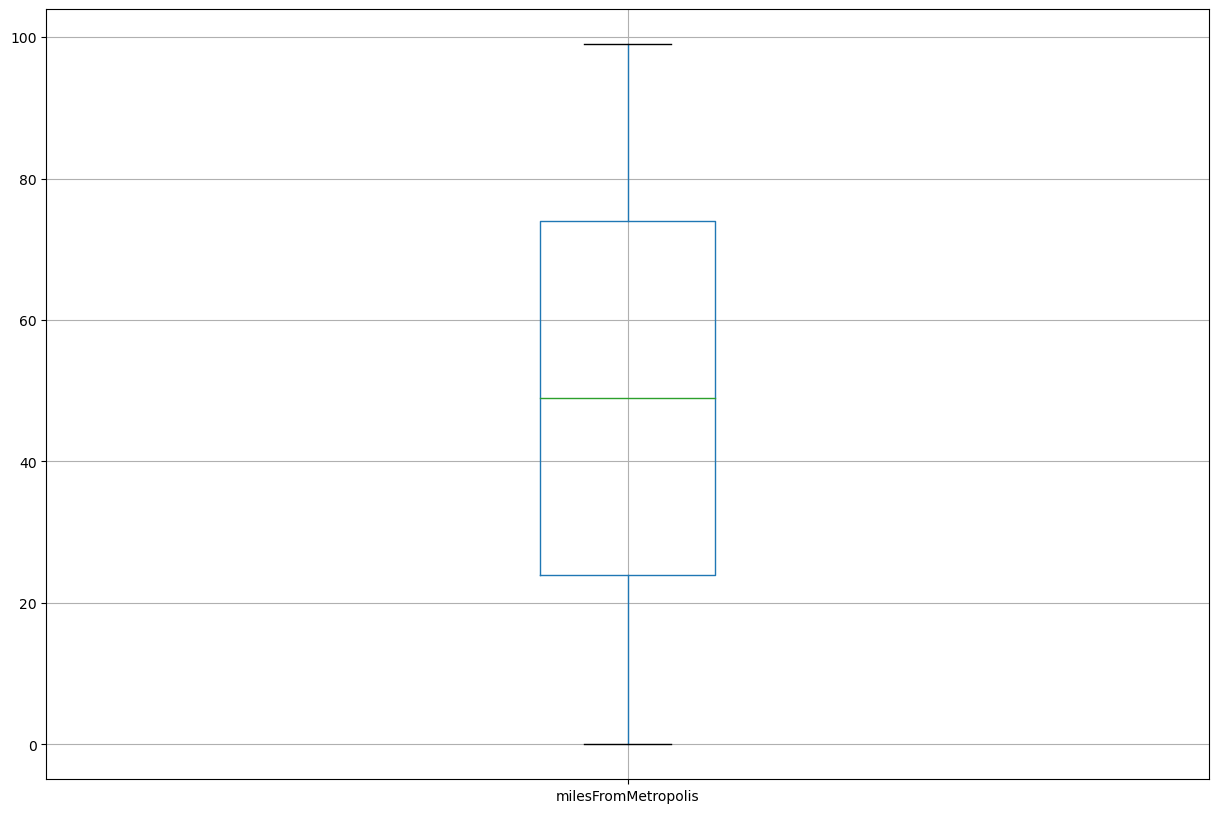

In [28]:
# box plot using pandas 
# box plot for milesFromMetropolies column
train_data.boxplot(column='milesFromMetropolis', figsize=(15, 10))






from above box plot graph:

- yearsExperience
  1. 25% of employees from dataset has value of milesFromMetropolis between range 0 to 24.
  2. 25% of employee has value of milesFromMetropolis between range 24 to 52.
  3. 25% of employee has value of milesFromMetropolis between range 52 to 76.
  4. 25% of employee has value of milesFromMetropolis between range 76 to 100

<AxesSubplot:>

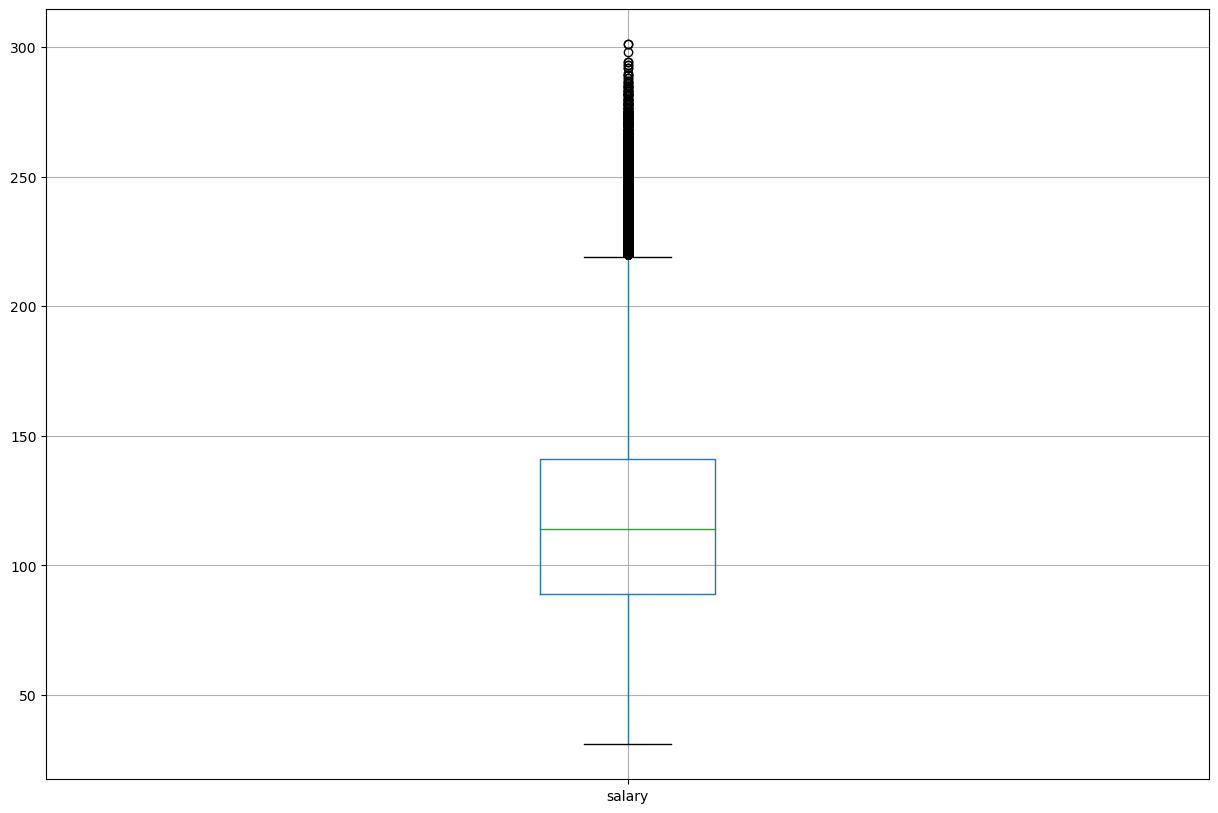

In [29]:
# box plot using pandas 
# box plot for salary column

train_data.boxplot(column='salary', figsize=(15, 10))



from above box plot graph:

- yearsExperience
  1. 25% of employees from dataset has value of salary between range 0 to 88.
  2. 25% of employee has value of salary between range 88 to 120.
  3. 25% of employee has value of salary between range 120 to 150.
  4. 25% of employee has value of salary between range 150 to 300


- The mean salary is around 120


## Violin Plot


<AxesSubplot:xlabel='yearsExperience', ylabel='salary'>

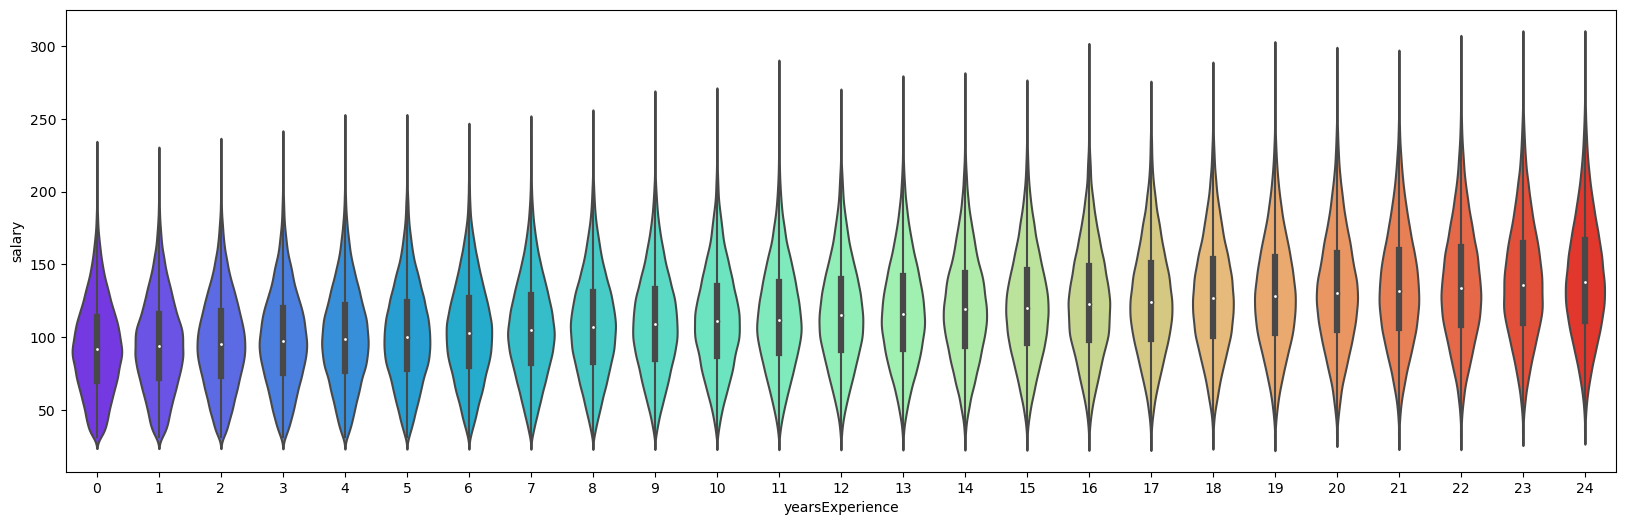

In [30]:
# violin plot for yearsExperience and salary columns
plt.figure(figsize=(20,6))
sns.violinplot(x='yearsExperience',y='salary', data=train_data,palette='rainbow')





from above violin plot:
1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile. whereas median has the highest.
3. The salary range is increasing as we move right on the axis of yearExperience

<AxesSubplot:xlabel='milesFromMetropolis', ylabel='salary'>

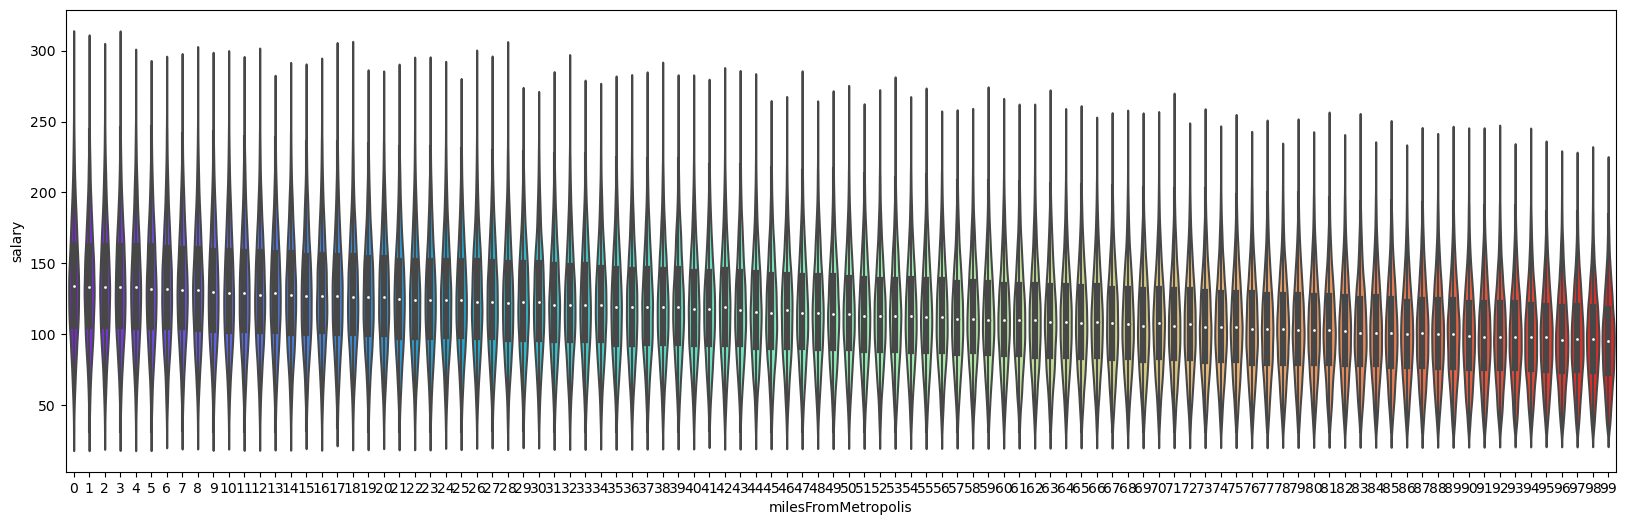

In [31]:
# violin plot for milesFromMetropolis from salary columns
plt.figure(figsize=(20,6))
sns.violinplot(x='milesFromMetropolis', y='salary', data=train_data, palette='rainbow')




from above violin plot:
1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile.
3. The salary range is decreasing as we move right on the axis of milesFromMetropolis

## Variance inflation factor (VIF)

1. The variance inflation factor (VIF) quantifies the extent of correlation between one predictor and the other predictors in a model. 
2. It is used for diagnosing collinearity/multicollinearity. 
3. Higher values signify that it is difficult to impossible to assess accurately the contribution of predictors to a model.

In [32]:
# import statsmodle library for vif 
import statsmodels.api as sm

In [33]:
# creating a dataframe of just numerical values
train_for_vif = train_data.drop(['jobType','degree','major','industry','salary'],axis=1)


# target values
target = train_data['salary']


# numerical values column names
names = ['yearsExperience','milesFromMetropolis']
train_for_vif.dropna(inplace=True)
names

['yearsExperience', 'milesFromMetropolis']

In [34]:
# Calculating VIF for each feature.
for i in range(0, len(names)):
  # taking one column as target variable
  y =train_for_vif.loc[:,train_for_vif.columns == names[i]] 
  # taking all other remaining columns as fetaure variable
  x =train_for_vif.loc[:,train_for_vif.columns != names[i]] 
  # firting the OLS model on y and x
  model = sm.OLS(y, x)
  results = model.fit() 
  # geting the r^2 value of results.
  rsq = results.rsquared
  # calculating vif value
  vif = round(1/(1-rsq),2)
  print("R Square value of {} column is {} keeping all other columns as features".format(names[i],(round(rsq, 2))))
  print("Variance inflation Factor of {} columns is {} \n".format(names[i], vif))

R Square value of yearsExperience column is 0.55 keeping all other columns as features
Variance inflation Factor of yearsExperience columns is 2.22 

R Square value of milesFromMetropolis column is 0.55 keeping all other columns as features
Variance inflation Factor of milesFromMetropolis columns is 2.22 



Observations:

there is colinearity/multicolinearity between 
variables as the VIF value is almost upto 2.5

1. yearsExperience and milesFromMetropolis both have colinearity with all the variables.

## ANOVA Test

### Normality Assumption Check

In [35]:
# perform anova test between two variables.

def perform_anova_test(x,y):
  # two variables of interest
  train_anova = train_data[[x,y]] 
  groups = train_anova.groupby(x).count().reset_index() 
  # groups.plot(kind='bar',x='major',y='salary')
  print(groups)


  unique_majors = train_anova[x].unique()
  for major in unique_majors:
      stats.probplot(train_anova[train_anova[x] == major][y], dist="norm", plot=plt)
      plt.title("Probability Plot - " +  str(major))
      plt.show()


  # calculate ratio of the largest to the smallest sample standard deviation
  ratio = train_anova.groupby(x).std().max() / train_anova.groupby(x).std().min()
  print(ratio)


  # Create ANOVA backbone table
  data = [['Between Groups', '', '', '', '', '', ''], ['Within Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']] 
  anova_table = pd.DataFrame(data, columns = ['Source of Variation', 'SS', 'df', 'MS', 'F', 'P-value', 'F crit'])    #ss=sum of squares source, ms=mean sum of squares source
  anova_table.set_index('Source of Variation', inplace = True)

  # calculate SSTR and update anova table
  x_bar = train_anova[y].mean()
  SSTR = train_anova.groupby(x).count() * (train_anova.groupby(x).mean() - x_bar)**2
  anova_table['SS']['Between Groups'] = SSTR[y].sum()

  # calculate SSE and update anova table
  SSE = (train_anova.groupby(x).count() - 1) * train_anova.groupby(x).std()**2
  anova_table['SS']['Within Groups'] = SSE[y].sum()

  # calculate SSTR and update anova table
  SSTR = SSTR[y].sum() + SSE[y].sum()
  anova_table['SS']['Total'] = SSTR

  # update degree of freedom
  anova_table['df']['Between Groups'] = train_anova[x].nunique() - 1
  anova_table['df']['Within Groups'] = train_anova.shape[0] - train_anova[x].nunique()
  anova_table['df']['Total'] = train_anova.shape[0] - 1

  # calculate MS
  anova_table['MS'] = anova_table['SS'] / anova_table['df']

  # calculate F 
  F = anova_table['MS']['Between Groups'] / anova_table['MS']['Within Groups']
  anova_table['F']['Between Groups'] = F

  # p-value
  anova_table['P-value']['Between Groups'] = 1 - stats.f.cdf(F, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

  # F critical 
  alpha = 0.05
  # possible types "right-tailed, left-tailed, two-tailed"
  tail_hypothesis_type = "two-tailed"
  if tail_hypothesis_type == "two-tailed":
      alpha /= 2
  anova_table['F crit']['Between Groups'] = stats.f.ppf(1-alpha, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

  # Final ANOVA Table
  print(anova_table)


  # The p-value approach
  print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
  conclusion = "Failed to reject the null hypothesis."
  if anova_table['P-value']['Between Groups'] <= alpha:
      conclusion = "Null Hypothesis is rejected."
  print("F-score is:", anova_table['F']['Between Groups'], " and p value is:", anova_table['P-value']['Between Groups'])    
  print(conclusion)
      
  # The critical value approach
  print("\n--------------------------------------------------------------------------------------")
  print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
  conclusion = "Failed to reject the null hypothesis."
  if anova_table['F']['Between Groups'] > anova_table['F crit']['Between Groups']:
      conclusion = "Null Hypothesis is rejected."
  print("F-score is:", anova_table['F']['Between Groups'], " and critical value is:", anova_table['F crit']['Between Groups'])
  print(conclusion)

         major  salary
0      BIOLOGY   58379
1     BUSINESS   58518
2    CHEMISTRY   58875
3      COMPSCI   58382
4  ENGINEERING   58594
5   LITERATURE   58684
6         MATH   57800
7         NONE  529906
8      PHYSICS   58410


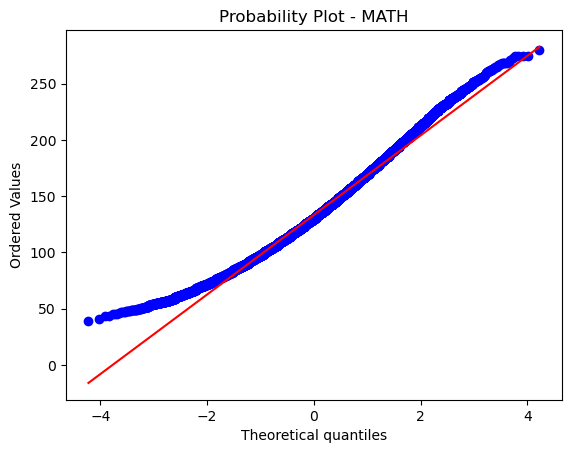

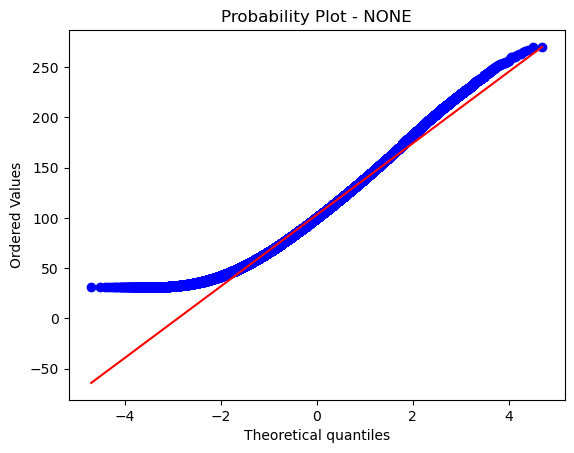

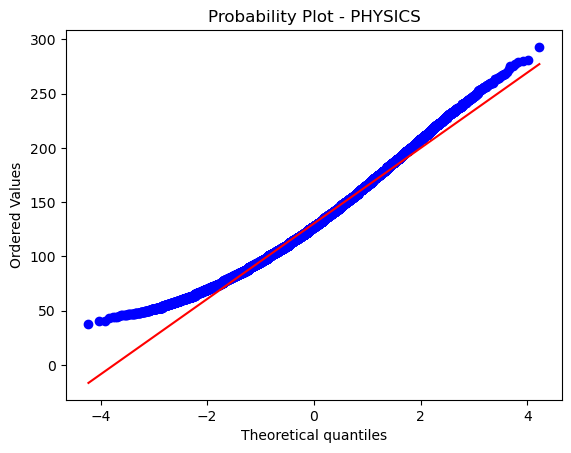

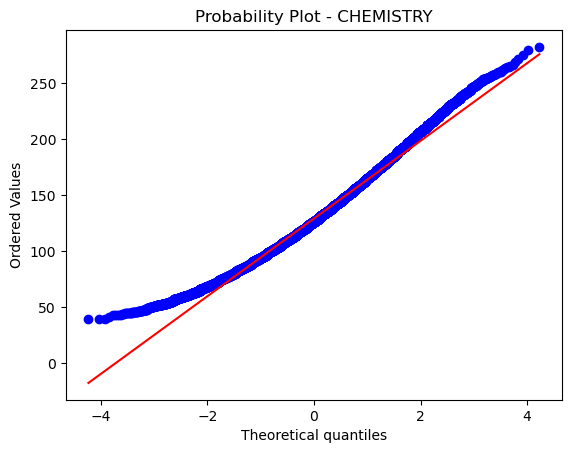

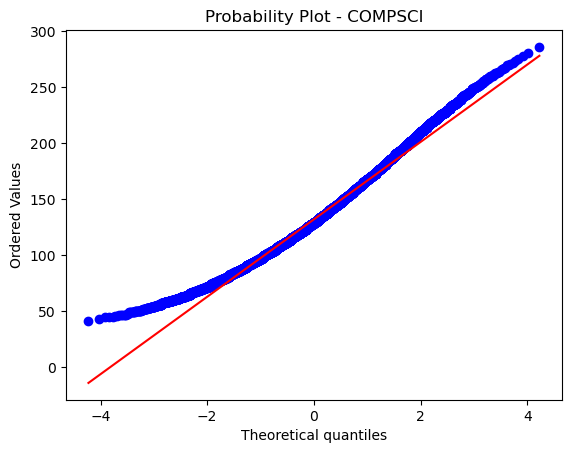

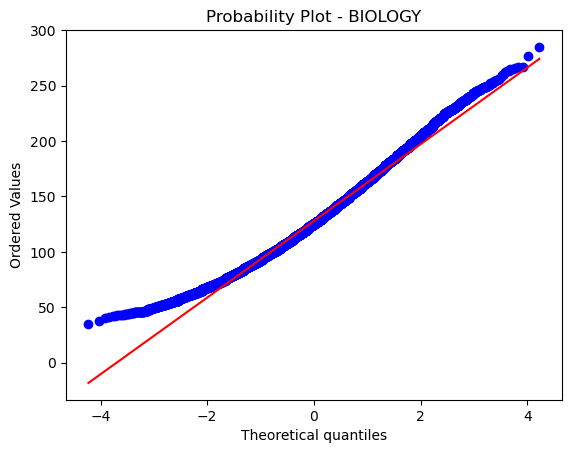

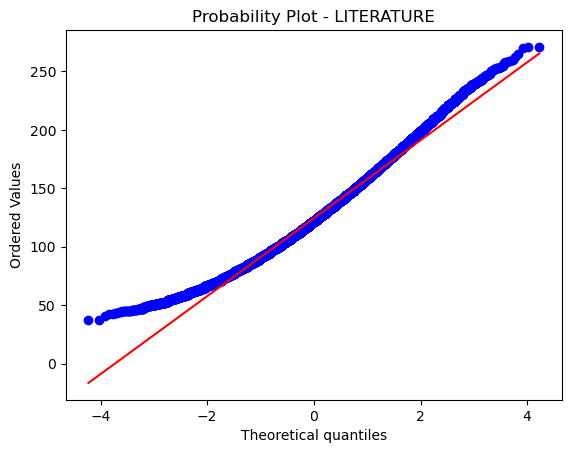

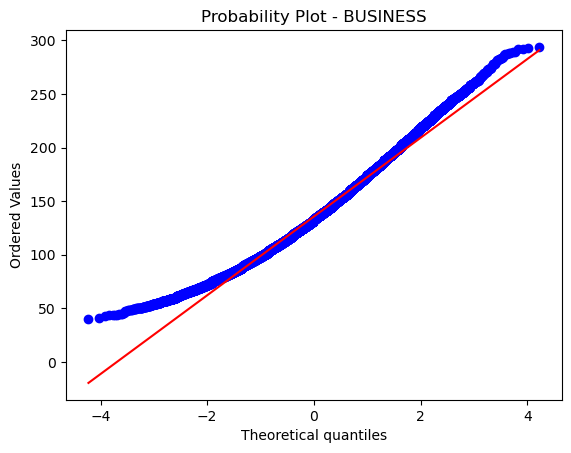

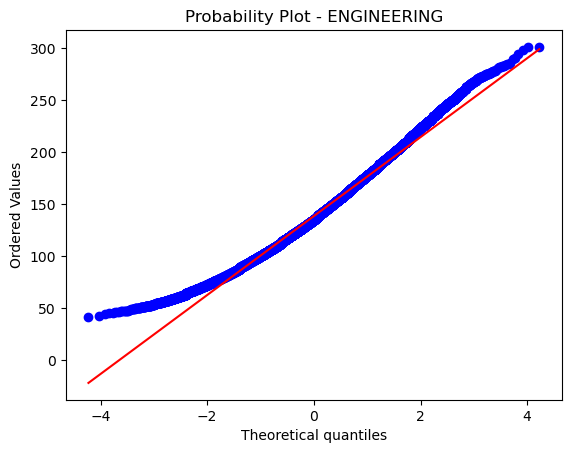

salary    1.137076
dtype: float64
                                    SS      df               MS             F  \
Source of Variation                                                             
Between Groups        209547309.494914       8  26193413.686864  20572.997068   
Within Groups        1270060536.615651  997539      1273.193867                 
Total                1479607846.110565  997547      1483.246249                 

                    P-value    F crit  
Source of Variation                    
Between Groups          0.0  2.191831  
Within Groups                          
Total                                  
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 20572.997067846136  and p value is: 1.1102230246251565e-16
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 2

In [36]:
# perform anova test on major and salary

perform_anova_test('major','salary') 


          jobType  salary
0             CEO  124778
1             CFO  124369
2             CTO  125045
3         JANITOR  122562
4          JUNIOR  124554
5         MANAGER  125120
6          SENIOR  125886
7  VICE_PRESIDENT  125234


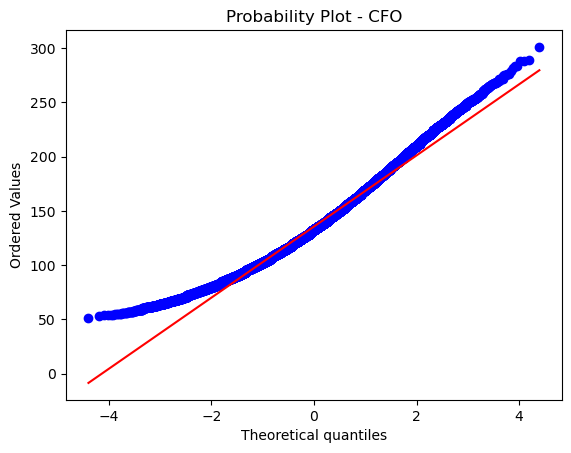

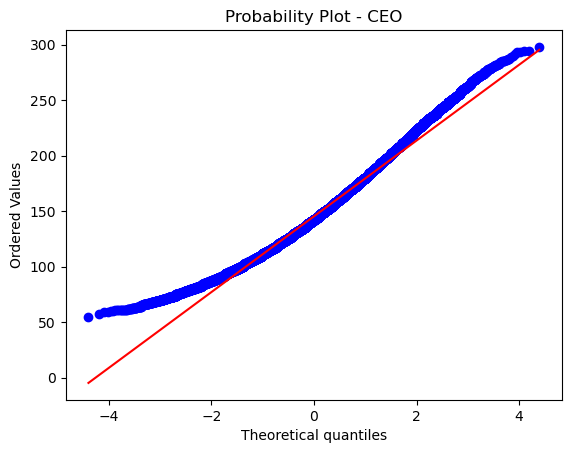

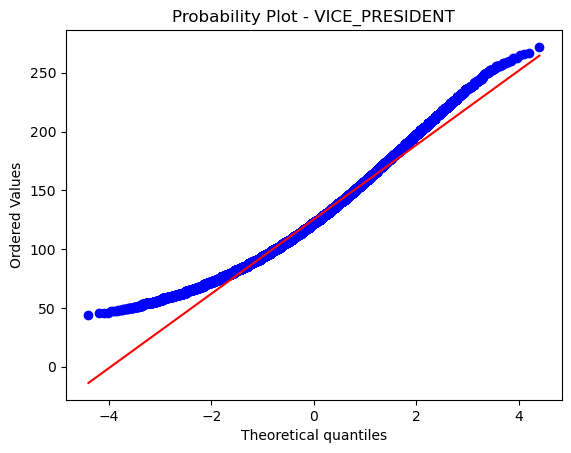

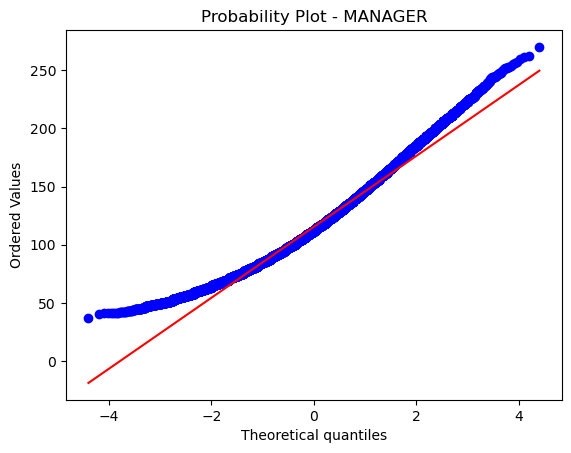

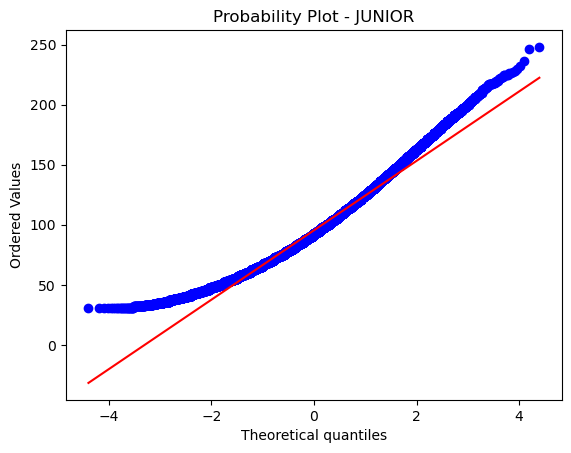

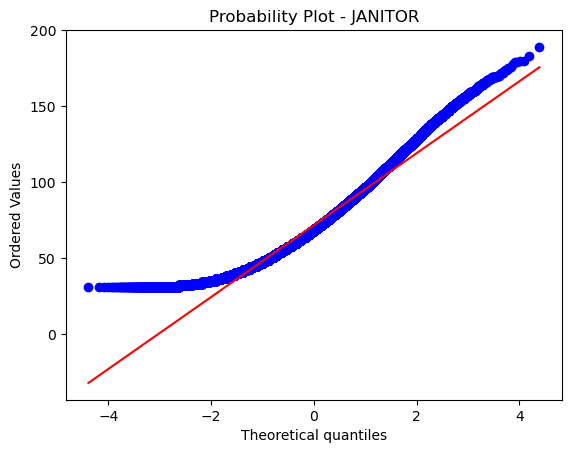

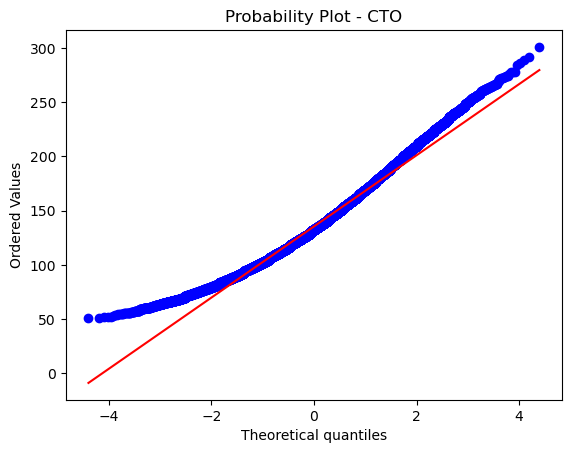

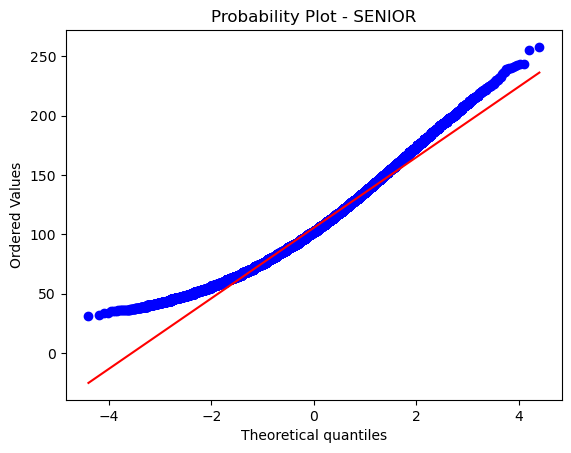

salary    1.428316
dtype: float64
                                    SS      df               MS             F  \
Source of Variation                                                             
Between Groups        520557906.406689       7  74365415.200956  77349.961883   
Within Groups         959049939.703873  997540       961.415021                 
Total                1479607846.110561  997547      1483.246249                 

                    P-value   F crit  
Source of Variation                   
Between Groups          0.0  2.28755  
Within Groups                         
Total                                 
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 77349.96188255494  and p value is: 1.1102230246251565e-16
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 77349.9

In [37]:
# perform anova test on jobType and salary

perform_anova_test('jobType','salary')


        degree  salary
0    BACHELORS  175495
1     DOCTORAL  175362
2  HIGH_SCHOOL  235769
3      MASTERS  175310
4         NONE  235612


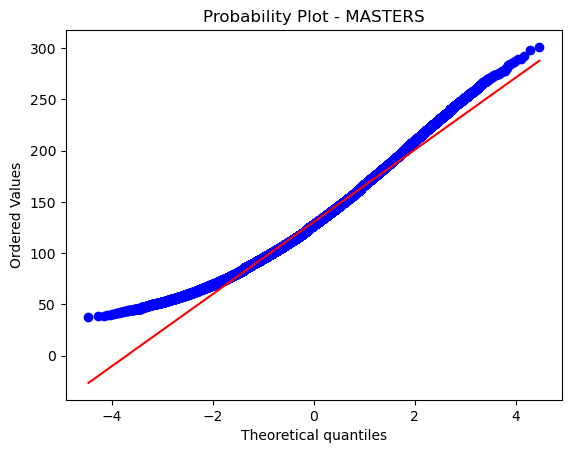

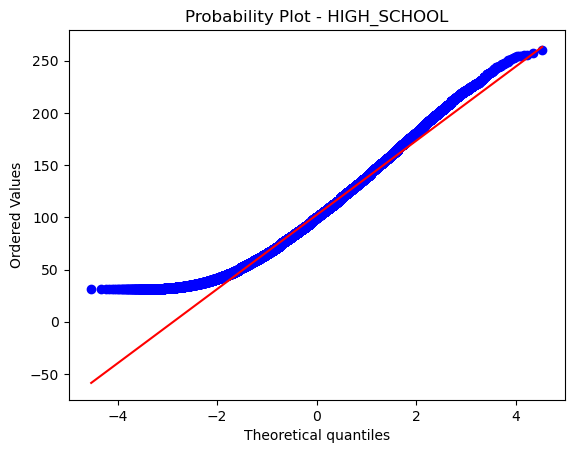

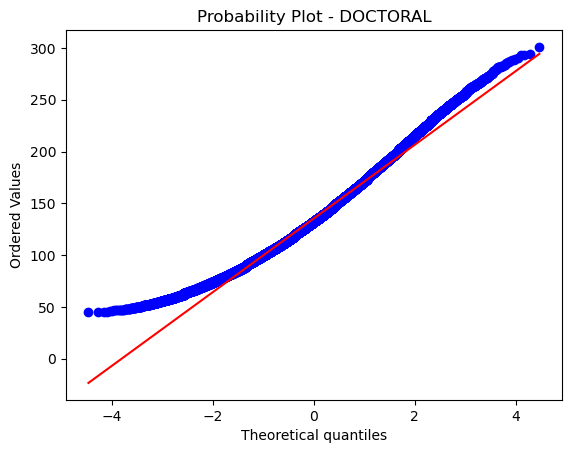

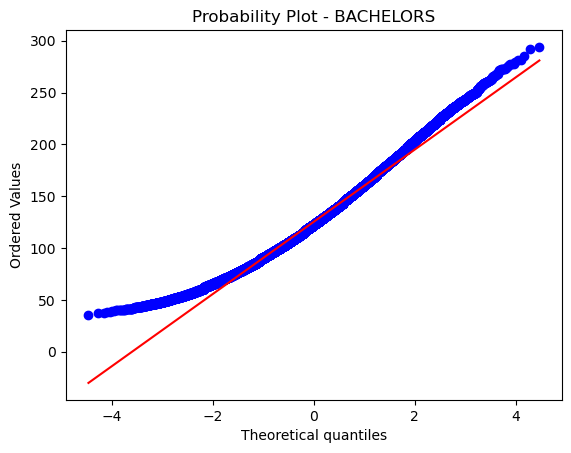

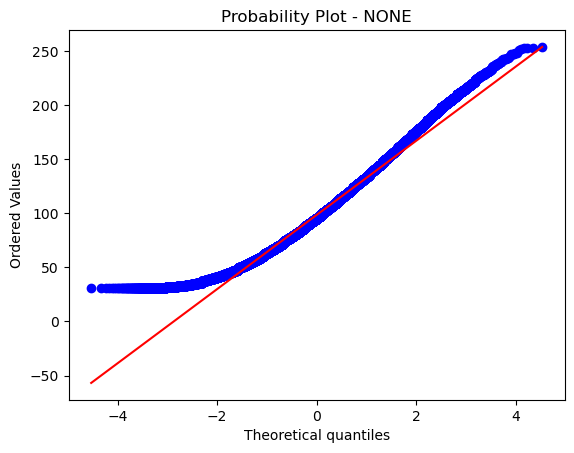

salary    1.034168
dtype: float64
                                    SS      df               MS             F  \
Source of Variation                                                             
Between Groups        235082352.781875       4  58770588.195469  47107.262306   
Within Groups        1244525493.328681  997543      1247.590824                 
Total                1479607846.110556  997547      1483.246249                 

                    P-value    F crit  
Source of Variation                    
Between Groups          0.0  2.785834  
Within Groups                          
Total                                  
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 47107.26230562572  and p value is: 1.1102230246251565e-16
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 47

In [38]:
# perform anova test on degree and salary

perform_anova_test('degree','salary')


    industry  salary
0       AUTO  142766
1  EDUCATION  141149
2    FINANCE  142866
3     HEALTH  142736
4        OIL  142770
5    SERVICE  142056
6        WEB  143205


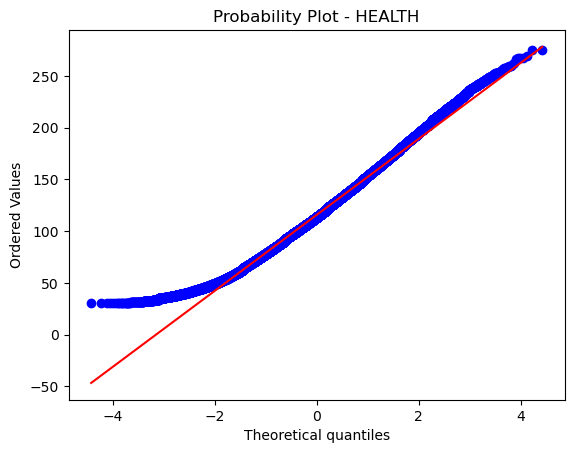

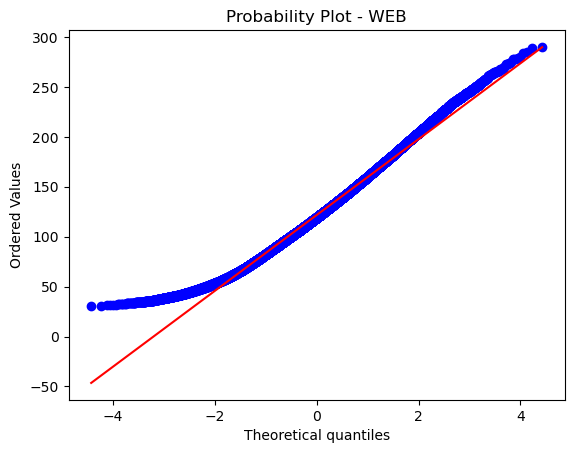

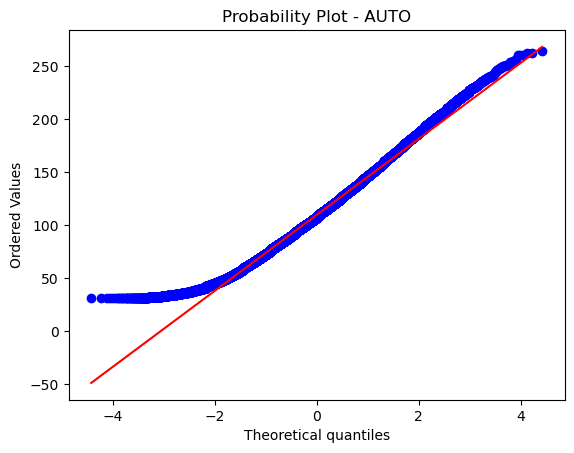

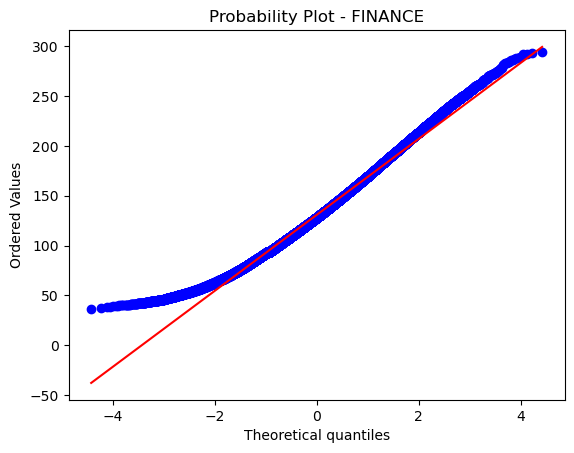

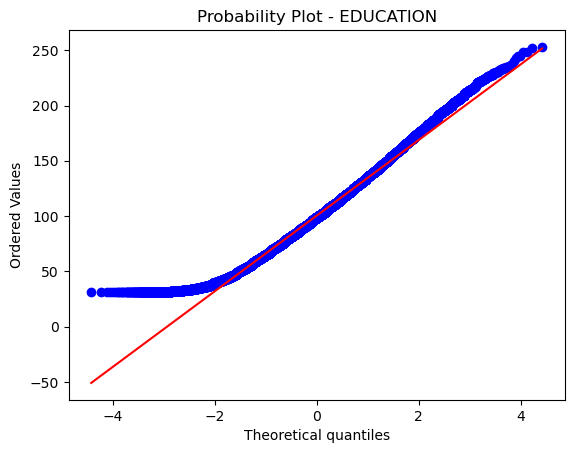

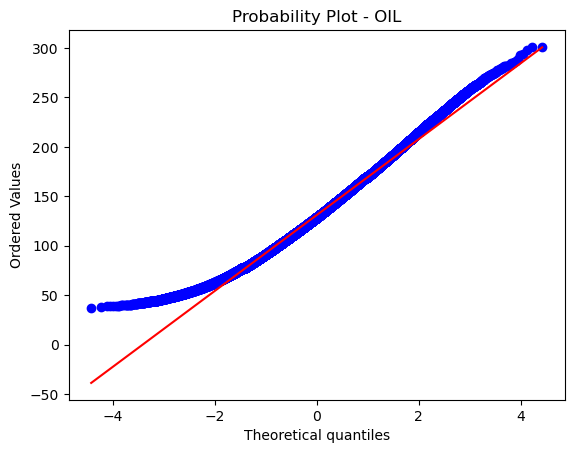

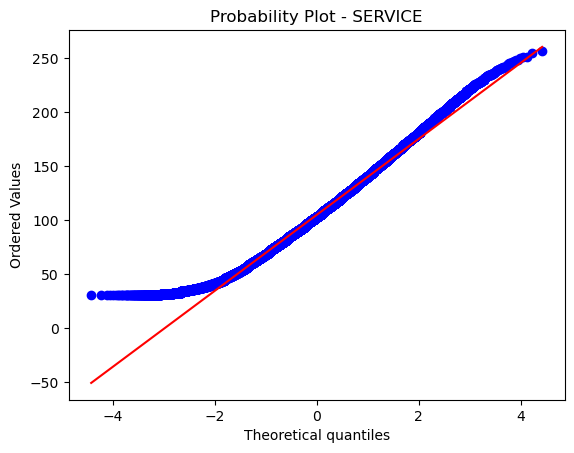

salary    1.119722
dtype: float64
                                    SS      df             MS             F  \
Source of Variation                                                           
Between Groups        126158683.032602       6  21026447.1721  15497.252287   
Within Groups         1353449163.07796  997541    1356.785499                 
Total                1479607846.110562  997547    1483.246249                 

                    P-value    F crit  
Source of Variation                    
Between Groups          0.0  2.408242  
Within Groups                          
Total                                  
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 15497.25228748466  and p value is: 1.1102230246251565e-16
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 15497.252287

In [39]:
# perform anova test on industry and salary

perform_anova_test('industry','salary')


          jobType  salary
0             CEO  124778
1             CFO  124369
2             CTO  125045
3         JANITOR  122562
4          JUNIOR  124554
5         MANAGER  125120
6          SENIOR  125886
7  VICE_PRESIDENT  125234


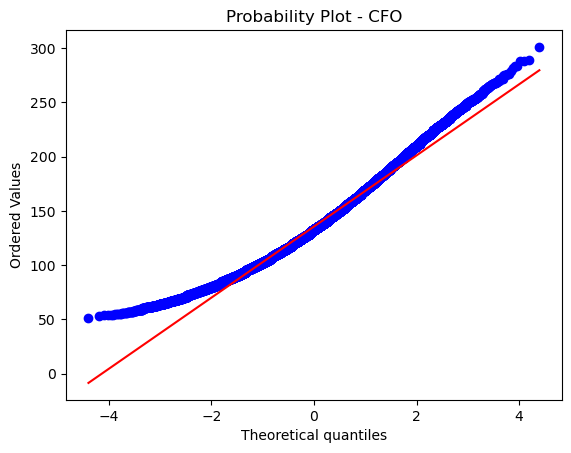

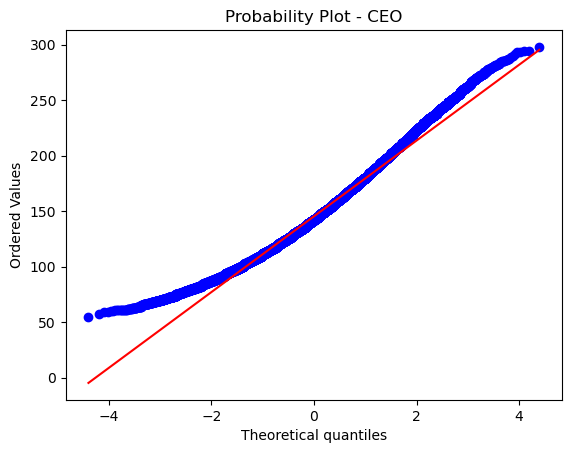

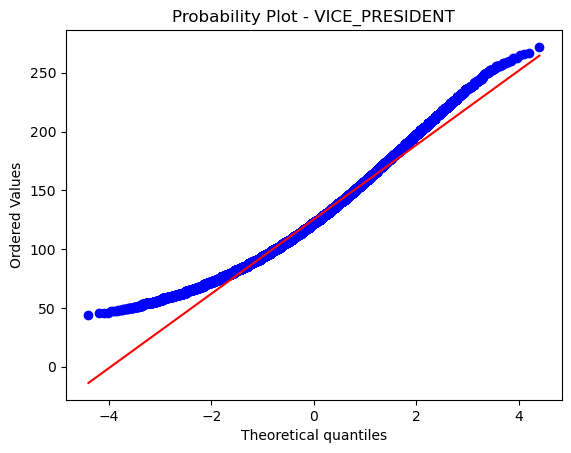

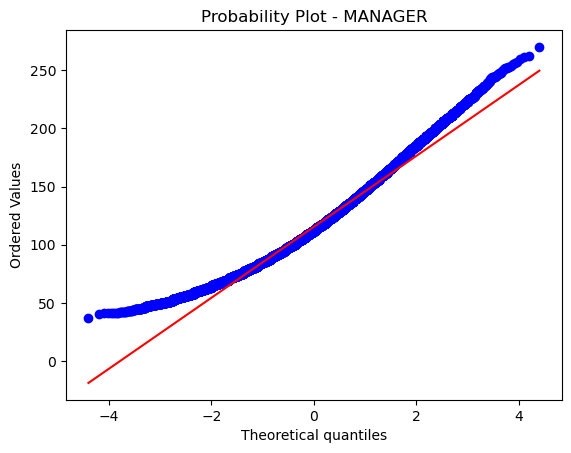

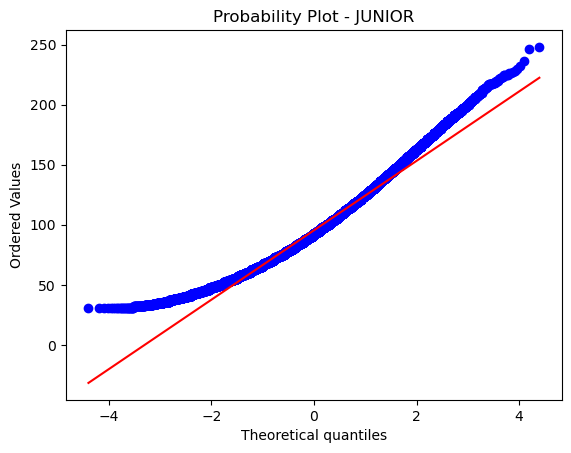

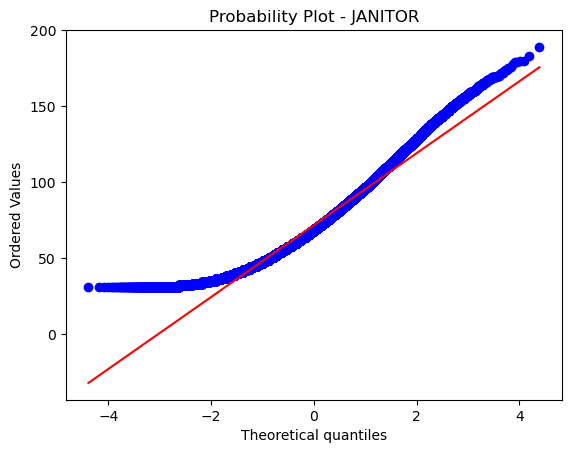

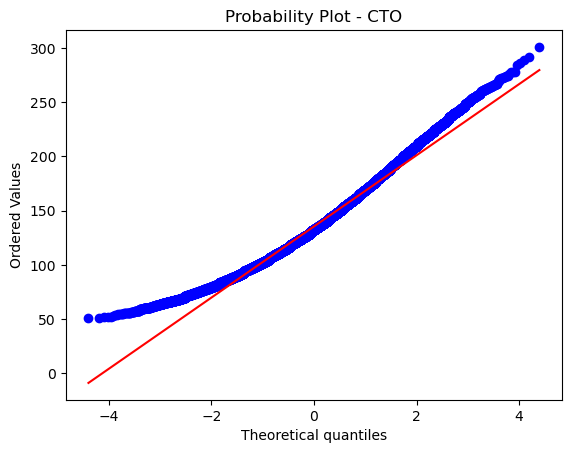

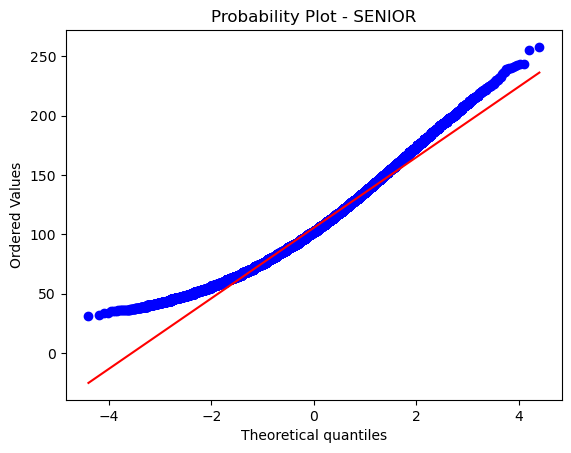

salary    1.428316
dtype: float64
                                    SS      df               MS             F  \
Source of Variation                                                             
Between Groups        520557906.406689       7  74365415.200956  77349.961883   
Within Groups         959049939.703873  997540       961.415021                 
Total                1479607846.110561  997547      1483.246249                 

                    P-value   F crit  
Source of Variation                   
Between Groups          0.0  2.28755  
Within Groups                         
Total                                 
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 77349.96188255494  and p value is: 1.1102230246251565e-16
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 77349.9

In [40]:
# perform anova test on jobType and yearsExperience

perform_anova_test('jobType','salary')


        degree  yearsExperience
0    BACHELORS           175495
1     DOCTORAL           175362
2  HIGH_SCHOOL           235769
3      MASTERS           175310
4         NONE           235612


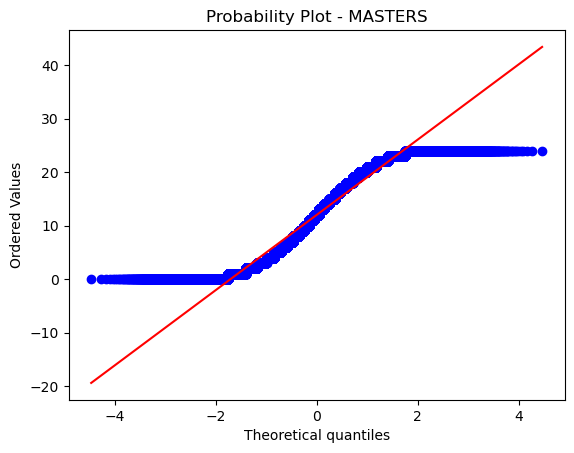

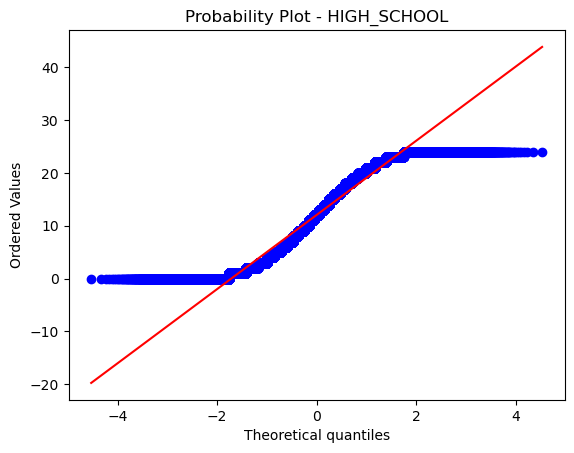

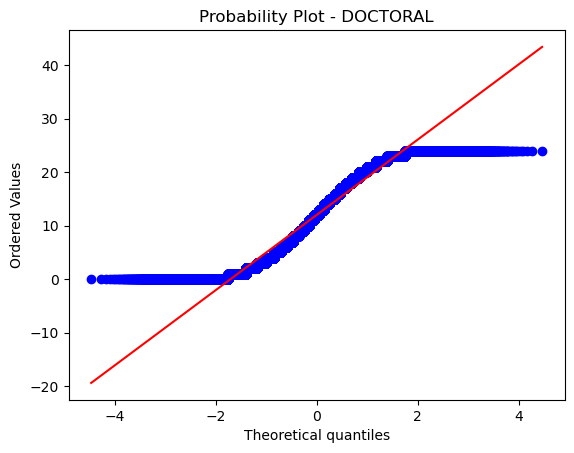

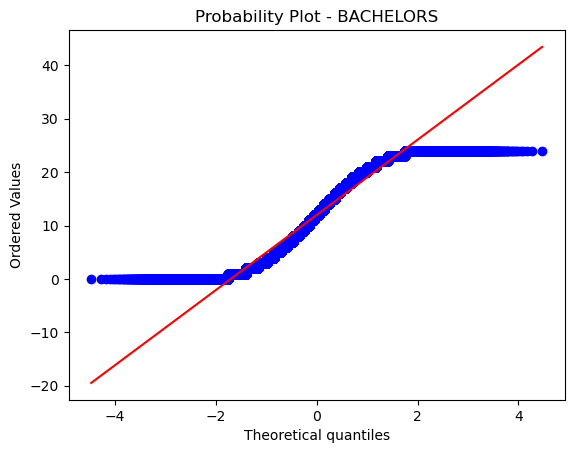

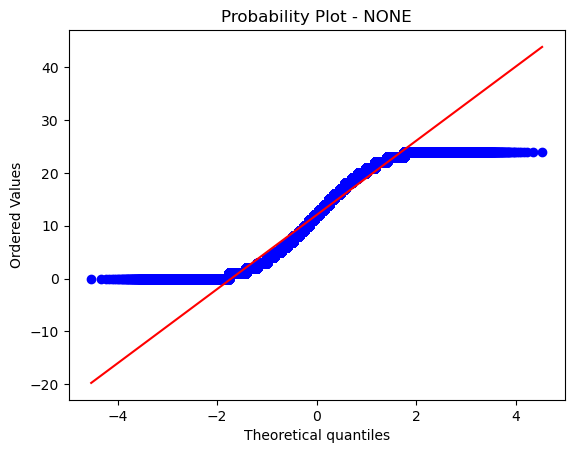

yearsExperience    1.003202
dtype: float64
                                  SS      df          MS         F  P-value  \
Source of Variation                                                           
Between Groups            667.587348       4  166.896837  3.215029  0.01198   
Within Groups        51783902.505138  997543   51.911449                      
Total                51784570.092486  997547    51.91191                      

                       F crit  
Source of Variation            
Between Groups       2.785834  
Within Groups                  
Total                          
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 3.2150294466062923  and p value is: 0.011980261991255126
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 3.2150294466062923  and critical value is: 2

In [41]:
# perform anova test on degree and yearsExperience

perform_anova_test('degree','yearsExperience')


         major  yearsExperience
0      BIOLOGY            58379
1     BUSINESS            58518
2    CHEMISTRY            58875
3      COMPSCI            58382
4  ENGINEERING            58594
5   LITERATURE            58684
6         MATH            57800
7         NONE           529906
8      PHYSICS            58410


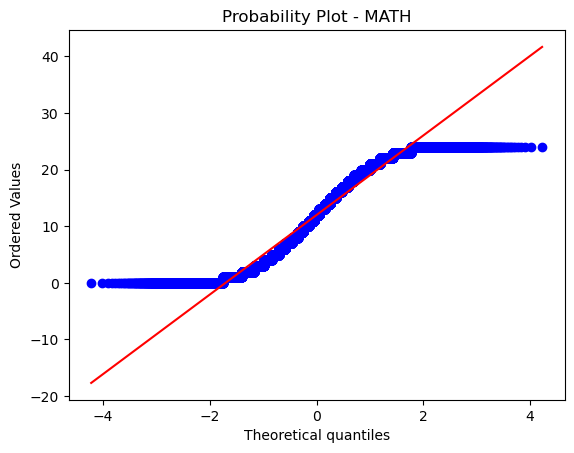

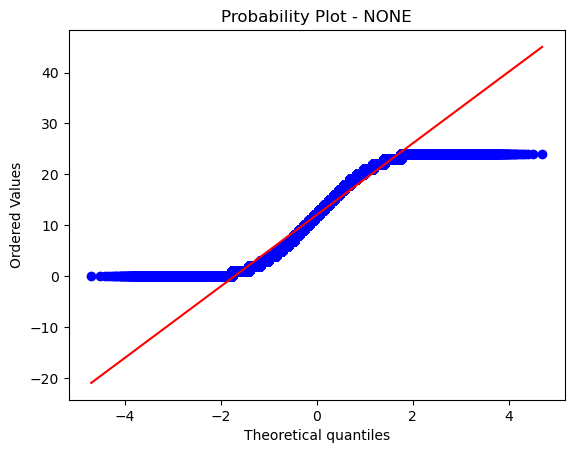

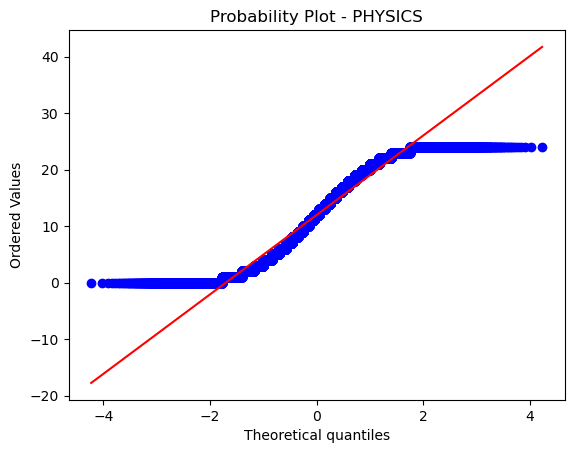

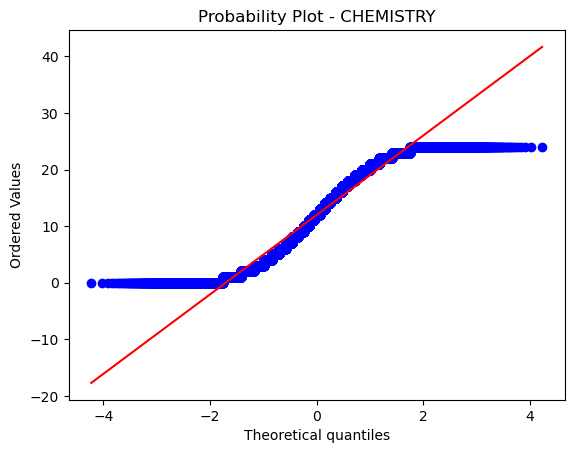

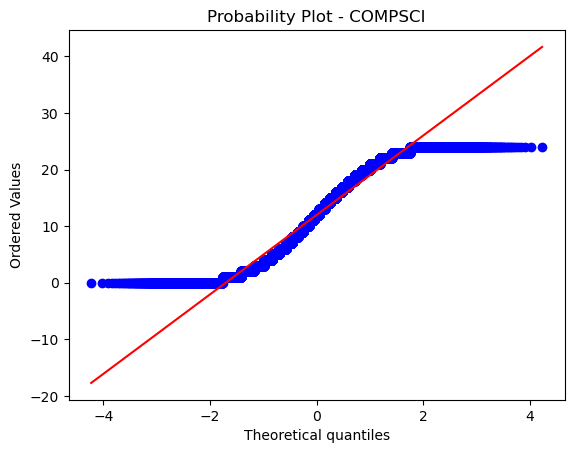

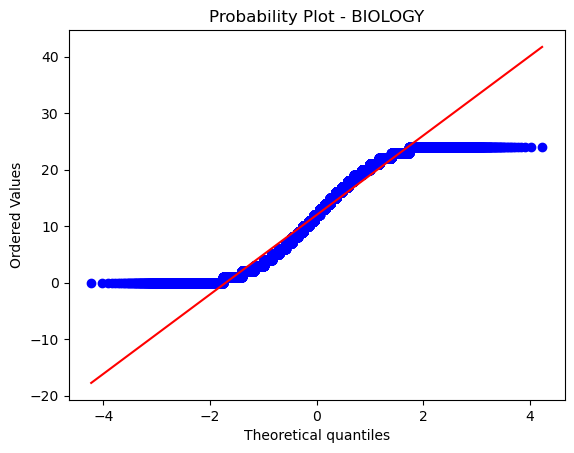

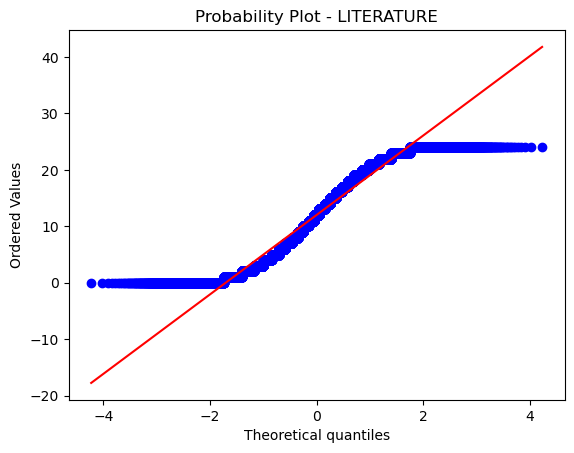

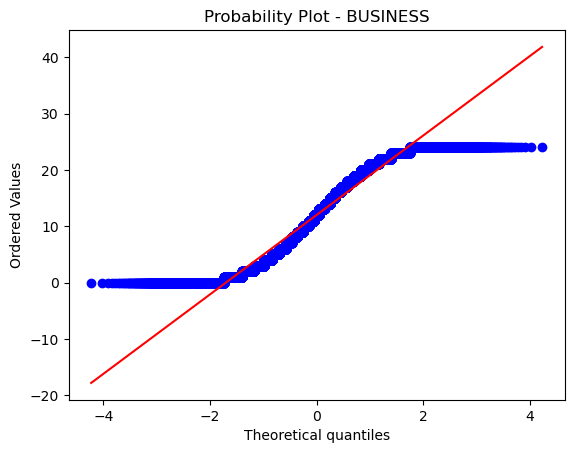

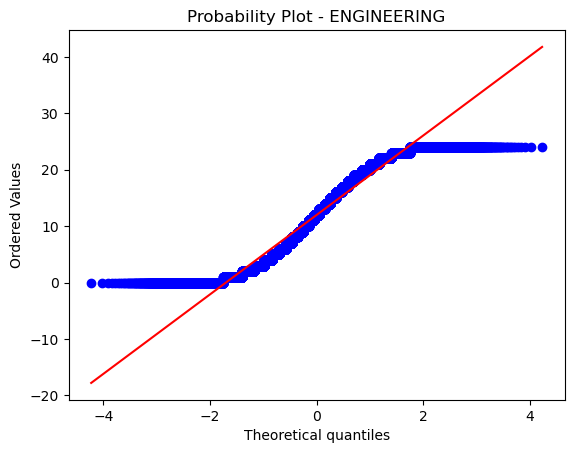

yearsExperience    1.006637
dtype: float64
                                  SS      df         MS         F  P-value  \
Source of Variation                                                          
Between Groups            565.919745       8  70.739968  1.362696  0.20734   
Within Groups         51784004.17274  997539  51.911759                      
Total                51784570.092485  997547   51.91191                      

                       F crit  
Source of Variation            
Between Groups       2.191831  
Within Groups                  
Total                          
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 1.3626964191505286  and p value is: 0.2073404736822877
Failed to reject the null hypothesis.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 1.3626964191505286  and critical value is:

In [42]:
# perform anova test on major and yearsExperience

perform_anova_test('major','yearsExperience')


    industry  yearsExperience
0       AUTO           142766
1  EDUCATION           141149
2    FINANCE           142866
3     HEALTH           142736
4        OIL           142770
5    SERVICE           142056
6        WEB           143205


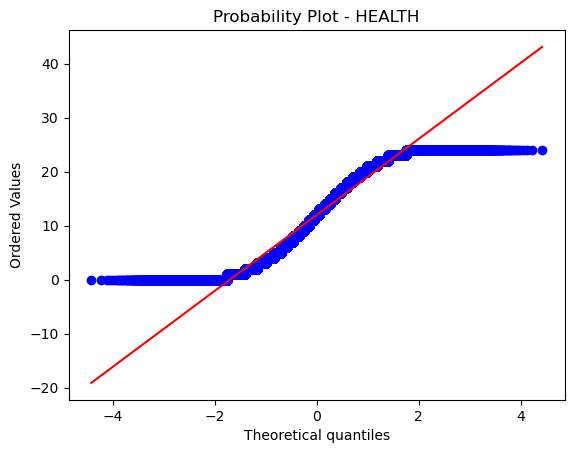

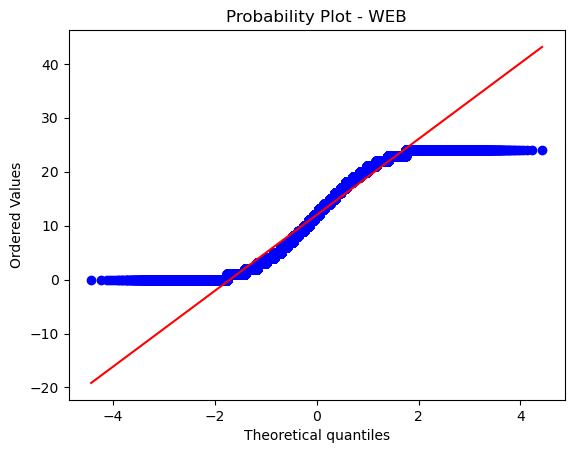

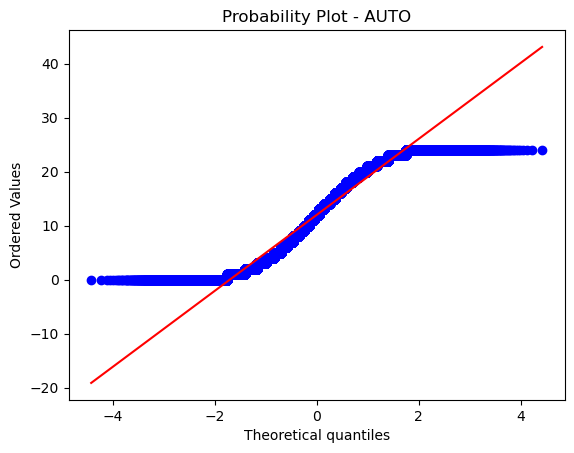

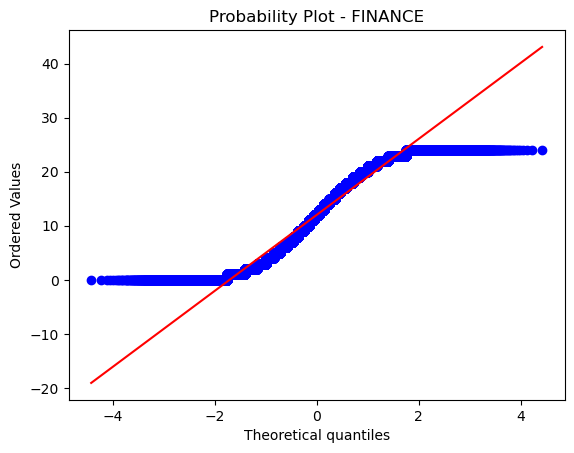

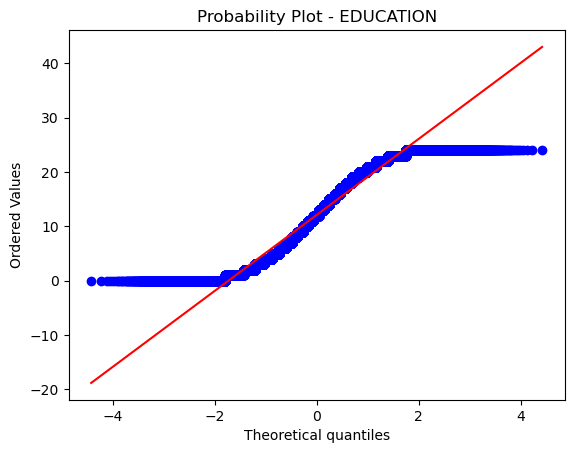

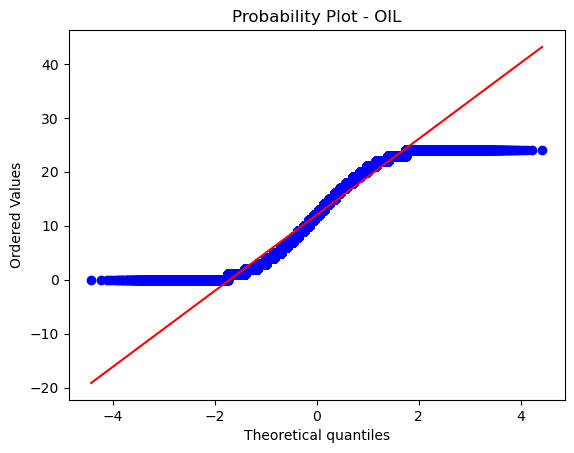

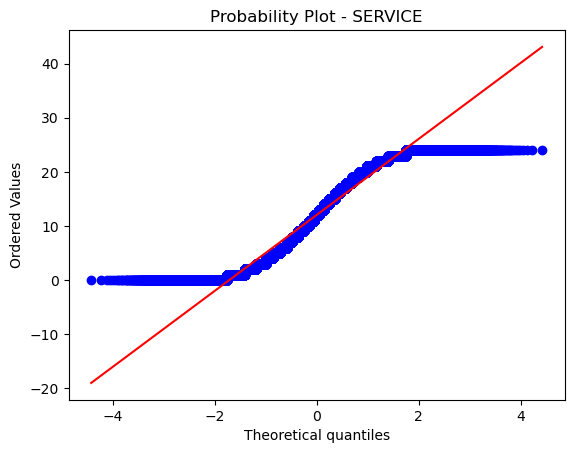

yearsExperience    1.00656
dtype: float64
                                  SS      df          MS         F   P-value  \
Source of Variation                                                            
Between Groups           1692.550226       6  282.091704  5.434191  0.000012   
Within Groups         51782877.54226  997541   51.910526                       
Total                51784570.092486  997547    51.91191                       

                       F crit  
Source of Variation            
Between Groups       2.408242  
Within Groups                  
Total                          
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 5.4341908776699475  and p value is: 1.249142777282053e-05
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 5.4341908776699475  and critical value 

In [43]:
# perform anova test on industry and yearsExperience

perform_anova_test('industry','yearsExperience')


## Dendrogram

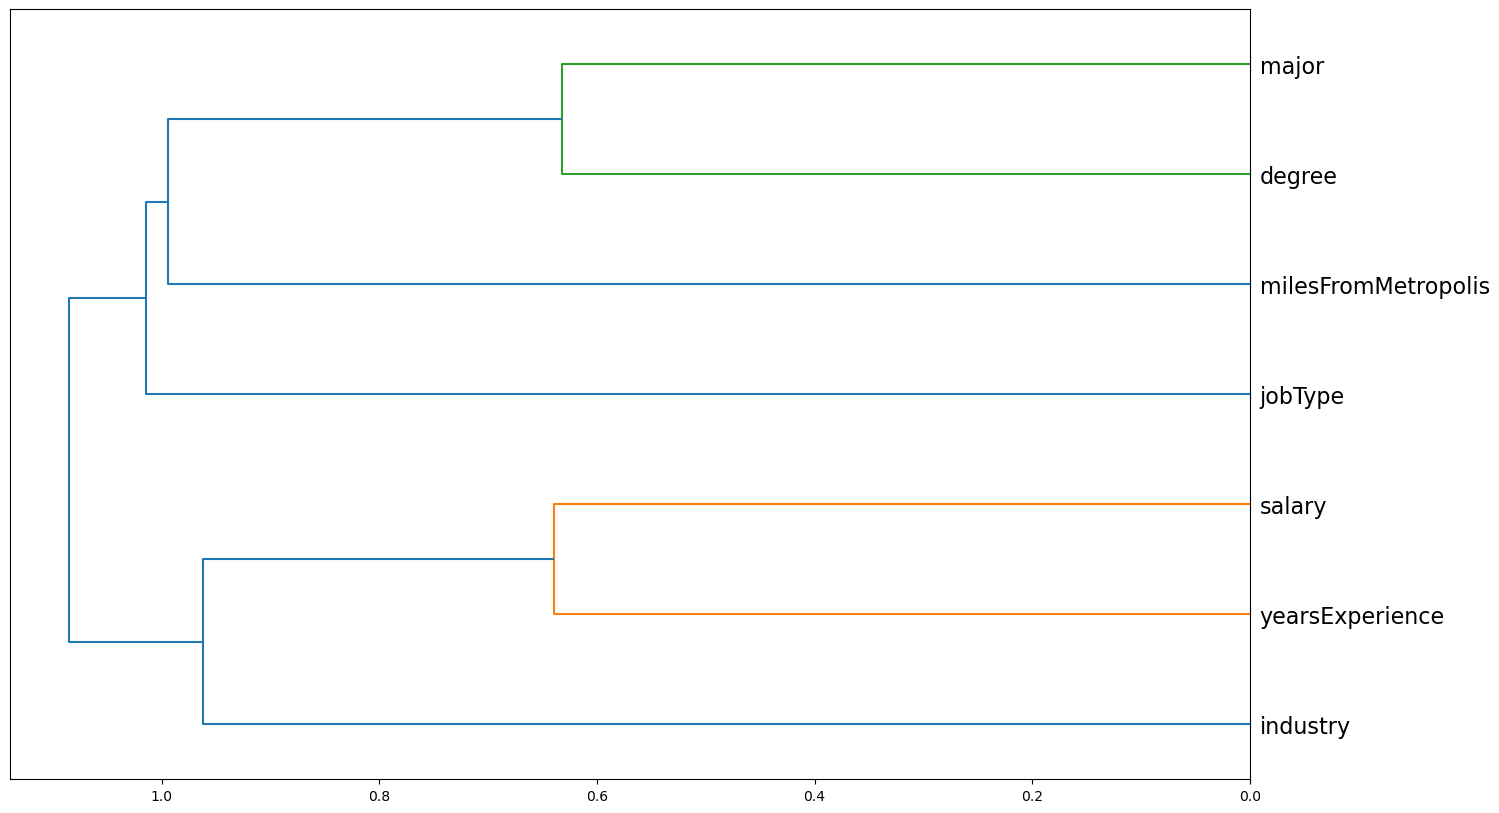

In [44]:
# Plot a Dendrogram on the columns of the dataset (use 50000 sample of 1000000)
X = train_data[1:50000]



import scipy
from scipy.cluster import hierarchy as hc

corr = np.round(scipy.stats.spearmanr(X).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=X.columns, orientation='left', leaf_font_size=16)
plt.show()




observation from dendrogram

Strongly correlated variables:
1. major and degree
2. salary and yearsExperience

## Since, there are no missing values and all the data are distributed equally. We can start converting the categoricl values to numerical.

## Scaling

In [45]:
# Helper function for scaling all the numerical data using MinMaxScalar
from sklearn.preprocessing import MinMaxScaler
def scale_data(df,col):
  
  scaler = MinMaxScaler()

  df[col] = scaler.fit_transform(df[col])
  return df

In [46]:
# Making a list of the column names to be scaled 
col_train = ['yearsExperience','milesFromMetropolis']

# passing data and name for scaling
train_data = scale_data(train_data,col_train)



# Modelling

### One-hot-encoding


In [47]:
# Importing OneHotEncoder for encoding the categorical data
from sklearn.preprocessing import OneHotEncoder as SklearnOneHotEncoder

# class for containing all functionality required for OneHotEncoding
class OneHotEncoder(SklearnOneHotEncoder):
    
    def __init__(self, **kwargs):
        super(OneHotEncoder, self).__init__(**kwargs)
        self.fit_flag = False
        
    # helper function to fit data  
    def fit(self, X, **kwargs):
        out = super().fit(X)
        self.fit_flag = True
        return out
    
    # helper function to transform data  
    def transform(self, X, **kwargs):
        sparse_matrix = super(OneHotEncoder, self).transform(X)
        new_columns = self.get_new_columns(X=X)
        d_out = pd.DataFrame(sparse_matrix.toarray(), columns=new_columns, index=X.index)
        return d_out
    
    # helper function to fit and transform data 
    def fit_transform(self, X, **kwargs):
        self.fit(X)
        return self.transform(X)
    
    # helper function to get new column names after fitting and tranforming data 
    def get_new_columns(self, X):
        new_columns = []
        for i, column in enumerate(X.columns):
            j = 0
            while j < len(self.categories_[i]):
                new_columns.append(f'{column}{self.categories_[i][j]}')
                j += 1
        return new_columns

In [48]:
# Split the labels and the target
train_X = train_data.drop(['salary','yearsExperience','milesFromMetropolis'],axis=1)
train_Y = train_data['salary']

In [49]:
# Features

train_X.head()


,jobType,degree,major,industry
0,CFO,MASTERS,MATH,HEALTH
1,CEO,HIGH_SCHOOL,NONE,WEB
2,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH
3,MANAGER,DOCTORAL,CHEMISTRY,AUTO
4,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE


In [50]:
# Target

train_Y.head()


0    130
1    101
2    137
3    142
4    163
Name: salary, dtype: int64

In [51]:
# passing features dataframe for one hot encoding process
encoder = OneHotEncoder()
train_X = encoder.fit_transform(train_X)
train_X = train_X.join(train_data['yearsExperience'])
train_X = train_X.join(train_data['milesFromMetropolis'])
train_X.head()

,jobTypeCEO,jobTypeCFO,jobTypeCTO,jobTypeJANITOR,jobTypeJUNIOR,jobTypeMANAGER,jobTypeSENIOR,jobTypeVICE_PRESIDENT,degreeBACHELORS,degreeDOCTORAL,...,majorPHYSICS,industryAUTO,industryEDUCATION,industryFINANCE,industryHEALTH,industryOIL,industrySERVICE,industryWEB,yearsExperience,milesFromMetropolis
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.416667,0.838384
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.125000,0.737374
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.416667,0.383838
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.171717
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.333333,0.161616


In [52]:
#importing Sklearn library for spliting train dataset into train and test dataset(size=0.2)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(train_X,train_Y,test_size=0.2) 

In [53]:
# importing necessary libraries for geting metrics of models
import math
import sklearn.metrics as metrics
from sklearn.metrics import median_absolute_error

# Function for calculating RMSE 
def rmse(x,y): 
    return math.sqrt(((x-y)**2).mean())
    


# Function for calculating all the relevant metrics 
def print_score(m):
    res = [rmse(m.predict(X_train), Y_train),rmse(m.predict(X_test),Y_test),
           m.score(X_train, Y_train),m.score(X_test, Y_test),
           median_absolute_error(m.predict(X_train), Y_train),median_absolute_error(m.predict(X_test), Y_test),
           metrics.mean_absolute_error(m.predict(X_train), Y_train),metrics.mean_absolute_error(m.predict(X_test), Y_test),
           ]

    
    

    print("RMSE-Train: " + str(res[0]) + "\nRMSE-Test: " + str(res[1]) + "\nScore-Train: " + str(res[2]) + "\nScore-Test: " + str(res[3]) +
         "\nMedAE-Train: " + str(res[4]) + "\nMedAE-Test: " + str(res[5]) + "\nMeanAE-Train: " + str(res[6]) + "\nMeanAE-Test: " + str(res[7]),'\n')


In [54]:
# Visualize importance of all the features in the dataset for the prediction

def visualize_importance(feature_importances, feat_train_df):
    
    # creating dataframe for feature name and feature importance
    feature_importance_df = pd.DataFrame()

    _df = pd.DataFrame()
    _df['feature_importance'] = feature_importances
    _df['column'] = feat_train_df.columns
    feature_importance_df = pd.concat([feature_importance_df,_df], axis=0,ignore_index=True)
    

    # grouping all data and sorting in descending order
    order = feature_importance_df.groupby('column')\
         .sum()[['feature_importance']]\
         .sort_values('feature_importance', ascending=False).index[:50]
    


    
    # ploting feature importance data using boxenplot
    fig, ax = plt.subplots(figsize=(8, max(6, len(order) * .25)))
    sns.boxenplot(data=feature_importance_df,
                  x='feature_importance',
                  y='column',
                  order=order,
                  ax=ax,
                  palette='viridis',
                  orient='h')
    ax.tick_params(axis='x', rotation=0)
    ax.set_title('Importance')
    ax.grid()
    fig.tight_layout()
 

    
    return fig, ax


### NOTE:
The employee salaries dataset has 1000000 samples.

We have used only 50000 samples for training.

If you want you can use complete dataset.

Using complete dataset will take longer time to train the model.

### Linear Regression

RMSE-Train: 19.630689516839364
RMSE-Test: 19.613491085420446
Score-Train: 0.7402122344041455
Score-Test: 0.7405468696713875
MedAE-Train: 13.765625
MedAE-Test: 13.765625
MeanAE-Train: 15.871407879778282
MeanAE-Test: 15.865419731467094 

Wall time: 637 ms


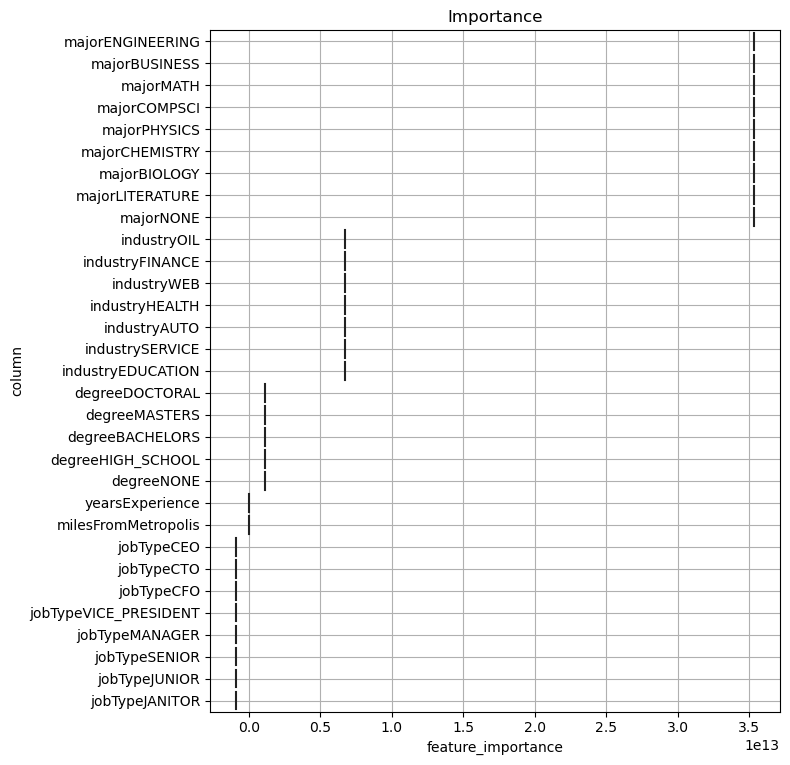

In [55]:
%%time
# Fit a Linear Regression model to the train dataset

# Import LinearRegressor
from sklearn.linear_model import LinearRegression

# Instantiate the model
lModel = LinearRegression() 

# Fit the model to the data
lModel.fit(X_train,Y_train)



# print score of the model
print_score(lModel)



# visualizing the inportance of features.
fig, ax = visualize_importance(lModel.coef_, train_X)




### Random Forest Regressor

Random forest is a flexible, easy to use machine learning algorithm that produces, even without hyper-parameter tuning, a great result most of the time. It is also one of the most used algorithms, because of its simplicity and diversity.

RMSE-Train: 20.032201535046106
RMSE-Test: 20.57152140308737
Score-Train: 0.7294765310553972
Score-Test: 0.7145816219334543
MedAE-Train: 13.11
MedAE-Test: 13.939999999999998
MeanAE-Train: 15.821422530172546
MeanAE-Test: 16.434123693507246 

Wall time: 1min 17s


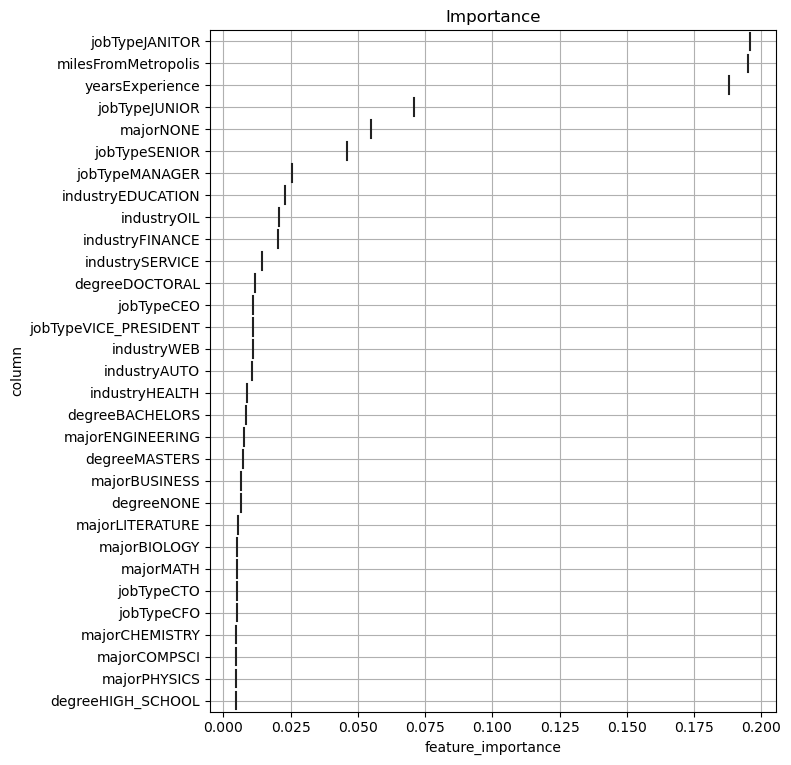

In [56]:
%%time
# Fit a Random Forest Regressor model to the train dataset

# Import RandomForrestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate the model
rf= RandomForestRegressor()


# Fit the model to the data
rf.fit(X_train.iloc[1:50000],Y_train.iloc[1:50000])



# print score of the model
print_score(rf)


# visualizing the inportance of features.
fig, ax = visualize_importance(rf.feature_importances_, train_X.iloc[1:50000])




### KNeighbors Regressor

In [57]:
%%time
# Fit a K-Neighbour Regressor model to the train dataset

# Import KNeighbourRegressor
from sklearn.neighbors import KNeighborsRegressor

# Instantiate the model
knnr = KNeighborsRegressor()


# print score of the model

knnr.fit(X_train.iloc[1:10000],Y_train.iloc[1:10000])


# print score of the model
print_score(knnr)





RMSE-Train: 23.864588344652706
RMSE-Test: 23.89825543845917
Score-Train: 0.616066965991471
Score-Test: 0.6148042314280977
MedAE-Train: 15.199999999999989
MedAE-Test: 15.200000000000003
MeanAE-Train: 18.608031447124066
MeanAE-Test: 18.631262593353718 

Wall time: 9min 44s


### Gradient Boosting Regressor

RMSE-Train: 19.415013976131277
RMSE-Test: 19.37948882676848
Score-Train: 0.7458892715211156
Score-Test: 0.746700842656484
MedAE-Train: 13.654999314613733
MedAE-Test: 13.641067912203297
MeanAE-Train: 15.692524162024046
MeanAE-Test: 15.669657900882159 

Wall time: 8.34 s


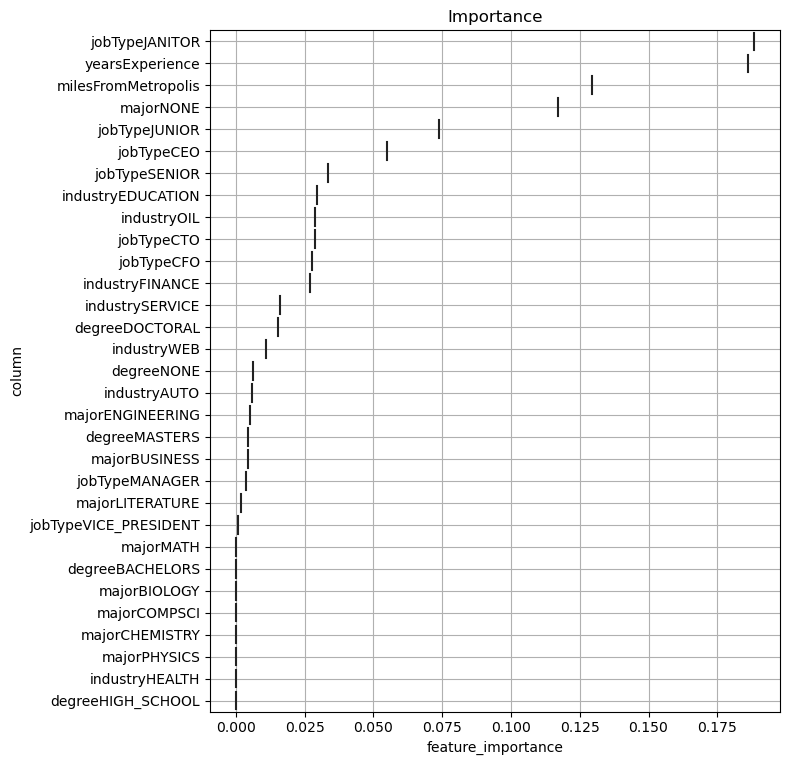

In [58]:
%%time
# Fit a Gradient Boosting Regressor model to the train dataset

# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate the model
GBR = GradientBoostingRegressor()


GBR.fit(X_train.iloc[1:50000], Y_train.iloc[1:50000])



# print score of the model
print_score(GBR)



# visualizing the inportance of features.
fig, ax = visualize_importance(GBR.feature_importances_, train_X.loc[1:50000])




### DecisionTree Regressor

In [59]:
%%time
# Fit a Decision Tree Regressor model to the train dataset

# Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

# Instantiate the model
DTR = DecisionTreeRegressor()



# Instantiate the model
DTR.fit(X_train.iloc[1:50000], Y_train.iloc[1:50000])


# print score of the model
print_score(DTR)



RMSE-Train: 26.944491931425805
RMSE-Test: 27.82380248669042
Score-Train: 0.5105733834020878
Score-Test: 0.4778658806224697
MedAE-Train: 16.0
MedAE-Test: 17.0
MeanAE-Train: 20.34052889712019
MeanAE-Test: 21.667822832606557 

Wall time: 1.06 s


### XGBoost

RMSE-Train: 19.302991143192212
RMSE-Test: 19.394947973490737
Score-Train: 0.7488132024585012
Score-Test: 0.7462965646388713
MedAE-Train: 13.458187103271484
MedAE-Test: 13.507579803466797
MeanAE-Train: 15.581323991822515
MeanAE-Test: 15.654660648305603 

Wall time: 2.48 s


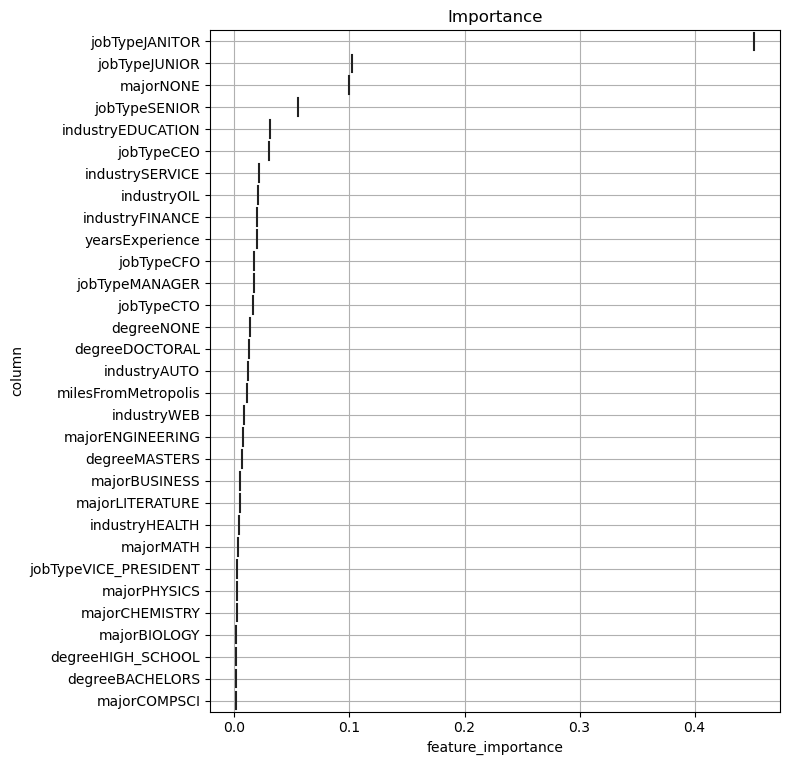

In [60]:
%%time
# Fit a XGB Regressor model to the train dataset

# Import XGBRegressor
from xgboost import XGBRegressor

# Instantiate the model
xgbr = XGBRegressor()


# Fit the model to the data
xgbr.fit(X_train.iloc[1:50000], Y_train.iloc[1:50000])


# print score of the model
print_score(xgbr)


# visualizing the inportance of features.
fig, ax = visualize_importance(xgbr.feature_importances_, train_X.iloc[1:50000]) 



### Light Gradient Boosted Machine

RMSE-Train: 19.046937299643574
RMSE-Test: 19.034546353803425
Score-Train: 0.7554329807352134
Score-Test: 0.7556377182519982
MedAE-Train: 13.45510604410552
MedAE-Test: 13.437092821775039
MeanAE-Train: 15.450110763370098
MeanAE-Test: 15.438324050708067 

Wall time: 3.3 s


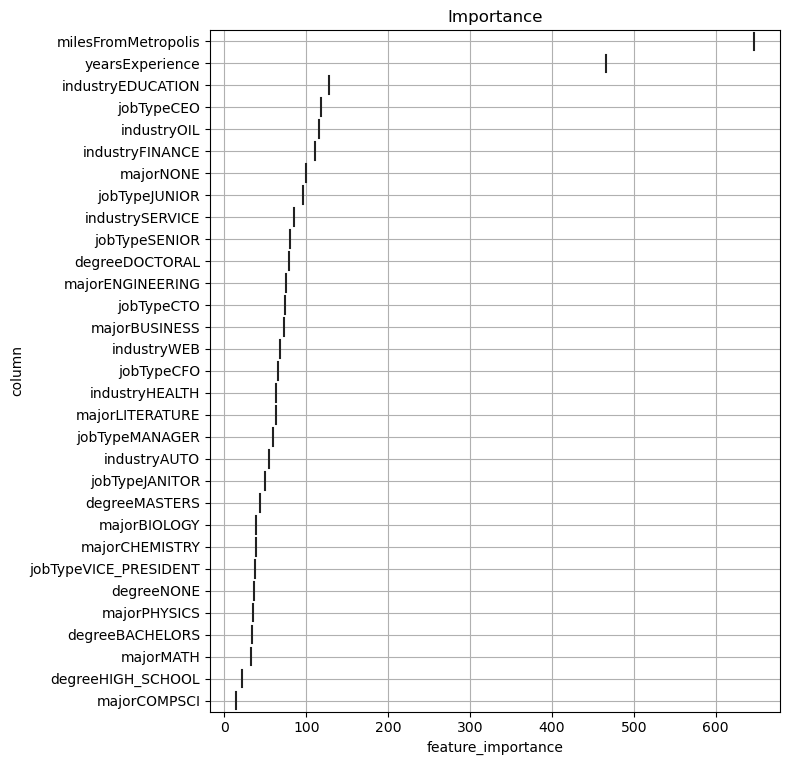

In [61]:
%%time
# Fit a lightgbm Regressor model to the train dataset

# Import lightgbm
import lightgbm as lgbm

# Instantiate the model
lg = lgbm.LGBMRegressor()


# Fit the model to the data

lg.fit(X_train.iloc[1:50000], Y_train.iloc[1:50000])

# print score of the model
print_score(lg)


# visualizing the inportance of features.
fig, ax = visualize_importance(lg.feature_importances_, train_X.iloc[1:50000])



### Comparing all the model based on metric

In [62]:
# the libraries we need
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
def compare_models(models,names,X_train,y_train,X_test,y_test):


    # now, create a list with the objects 
    data = {'Metric':['rmse','MedAE','MAE','R-squared']}
    df_train = pd.DataFrame(data)
    df_test = pd.DataFrame(data)

    def rmse(x,y):
      return math.sqrt(((x-y)**2).mean())


    for (model,name) in zip(models,names):
      y_pred= model.predict(X_test) # then predict on the test set
      res = [rmse(model.predict(X_train), y_train),rmse(model.predict(X_test), y_test),
                metrics.median_absolute_error(model.predict(X_train), y_train),metrics.median_absolute_error(model.predict(X_test), y_test),
                metrics.mean_absolute_error(model.predict(X_train), y_train),metrics.mean_absolute_error(model.predict(X_test), y_test),
                metrics.r2_score(model.predict(X_train), y_train),metrics.r2_score(model.predict(X_test), y_test)]
      df_train[name] = [res[0], res[2], res[4], res[6]]
      df_test[name] = [res[1], res[3], res[5], res[7]]
    return df_train,df_test

In [63]:
# list of models object
# list of models name
models= [lg, DTR, rf, knnr, GBR, xgbr,]
names = ['Lr', 'Dtree', 'Forest', 'Knn','GBR', 'Xboost']
comp_model_train,comp_model_test = compare_models(models,names,X_train,Y_train,X_test,Y_test)

#### RMSE of all model on train and test data

In [64]:
# printing rmse comparision of model on train and test
print(comp_model_train[:1])
print('\n')
print(comp_model_test[:1])



  Metric         Lr      Dtree     Forest        Knn        GBR     Xboost
0   rmse  19.046937  26.944492  20.032202  23.864588  19.415014  19.302991


  Metric         Lr      Dtree     Forest        Knn        GBR     Xboost
0   rmse  19.034546  27.823802  20.571521  23.898255  19.379489  19.394948


#### All metrics on train and test data

In [65]:
# printing comparision of model on train and test
print("Results on Test data")
comp_model_test


Results on Test data


,Metric,Lr,Dtree,Forest,Knn,GBR,Xboost
0,rmse,19.034546,27.823802,20.571521,23.898255,19.379489,19.394948
1,MedAE,13.437093,17.000000,13.940000,15.200000,13.641068,13.507580
2,MAE,15.438324,21.667823,16.434124,18.631263,15.669658,15.654661
3,R-squared,0.674228,0.488912,0.632779,0.422587,0.612954,0.671607


## Hyperparameter Tunning


### RamdomizedSearchCV

In [66]:
# Helper function to perform hyper parameter tunning with RandomizedSearchCV
def random_Search(model,X_train, Y_train,param_grid):
  from sklearn.model_selection import RandomizedSearchCV

  # Random search of parameters, using 3 fold cross validation, 
  # search across 100 different combinations, and use all available cores
  random = RandomizedSearchCV(estimator = model, param_distributions = param_grid, n_iter = 20, cv = 3, verbose=2, random_state=42, n_jobs = -1)
  random.fit(X_train.iloc[1:50000], Y_train.iloc[1:50000])  
  print(random.best_params_)


  

In [67]:
# create parameters dict for tunning
rf_para_grid = {'n_estimators': [1, 2, 4, 8, 16, 32, 64, 100, 200],
               'max_features': ['auto', 'sqrt'],
               'max_depth': np.linspace(1, 32, 32, endpoint=True),
               'min_samples_leaf': np.linspace(0.1, 0.5, 5, endpoint=True),
               'bootstrap': [True, False]}

# passing data for hyper parameter tunning with Randomized search cv
random_Search(RandomForestRegressor(),X_train, Y_train, param_grid=rf_para_grid)




Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'n_estimators': 64, 'min_samples_leaf': 0.1, 'max_features': 'auto', 'max_depth': 27.0, 'bootstrap': False}


In [68]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# create GradientBoostRegressor parameters dict for tunning
GBR_para_grid = {
'n_estimators':  [1, 2, 4, 8, 16, 32, 64, 100, 200], 
 'learning_rate' : [1, 0.5, 0.25, 0.1, 0.05, 0.01],
 'max_depth': np.linspace(1, 32, 32, endpoint=True), 
 'min_samples_split': np.linspace(0.1, 1.0, 10, endpoint=True)
}

# passing data for hyper parameter tunning with Randomized search cv
random_Search(GradientBoostingRegressor(),X_train, Y_train, param_grid=GBR_para_grid )





Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'n_estimators': 64, 'min_samples_split': 0.1, 'max_depth': 8.0, 'learning_rate': 0.25}


In [69]:
# create DecisionTreeRegressor parameters dict for tunning
DTR_para_grid = {
                  "splitter":["best","random"],
            "max_depth" : np.linspace(1, 32, 32, endpoint=True),
           "min_samples_leaf":np.linspace(0.1, 0.5, 5, endpoint=True),
           "min_weight_fraction_leaf":[0.1,0.2,0.5,0.9],
           "max_features":["auto","log2","sqrt",None],
           }

# passing data for hyper parameter tunning with Randomized search cv
random_Search(DecisionTreeRegressor(),X_train, Y_train, param_grid=DTR_para_grid )





Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'splitter': 'random', 'min_weight_fraction_leaf': 0.2, 'min_samples_leaf': 0.2, 'max_features': None, 'max_depth': 20.0}


In [70]:
from xgboost import XGBRegressor


# create parameters dict for tunning
XGB_para_grid = {
    "learning_rate"    : [0.05, 0.10, 0.15] ,
 "max_depth"        : range(3,10,2),
 "min_child_weight" : range(1,6,2),
 "gamma"            : [ 0.0, 0.1, 0.2 ],
 "colsample_bytree" : [ 0.3, 0.4] 
 }

# passing data for hyper parameter tunning with Randomized search cv

random_Search(XGBRegressor(),X_train, Y_train, param_grid=XGB_para_grid )




Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.15, 'gamma': 0.1, 'colsample_bytree': 0.4}


## Using the best parameters and training the models

### Random Forest Regressor

RMSE-Train: 29.98992774064215
RMSE-Test: 29.93227719010047
Score-Train: 0.39368484330106845
Score-Test: 0.39573334857179276
MedAE-Train: 20.68163592622294
MedAE-Test: 20.668122270742245
MeanAE-Train: 24.050004985402406
MeanAE-Test: 24.003133498527916 

Wall time: 7.2 s


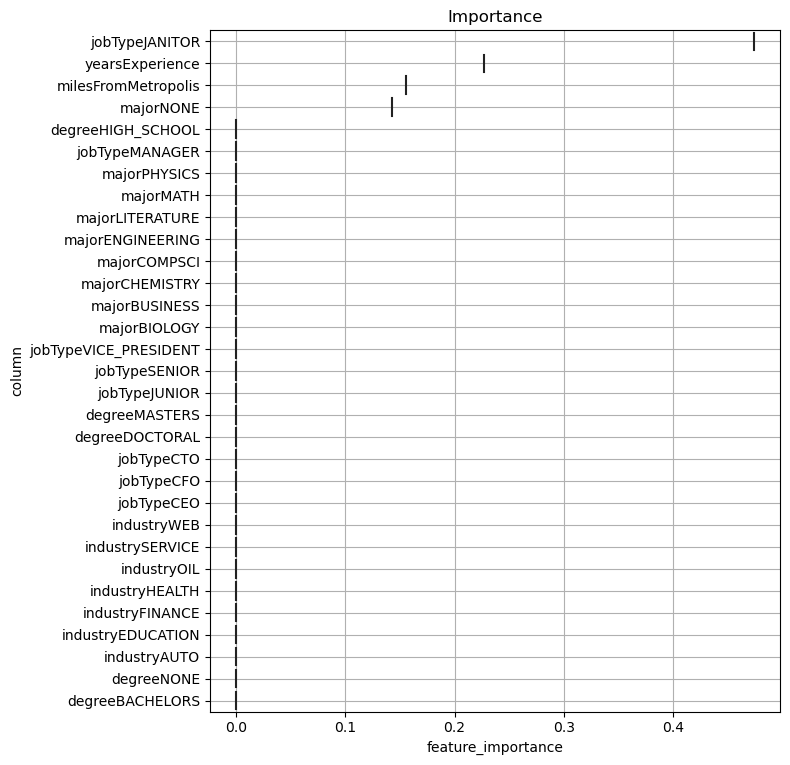

In [71]:
%%time
# Fit a Random Forest Regressor model to the train dataset

# Instantiate the model
rf= RandomForestRegressor(**{'n_estimators': 64, 'min_samples_leaf': 0.1, 'max_features': 'auto', 'max_depth': 27.0, 'bootstrap': False})



# Fit the model to the data
rf.fit(X_train.iloc[1:10000],Y_train.iloc[1:10000])


# print score of the model
print_score(rf)


# visualizing the inportance of features.
fig, ax = visualize_importance(rf.feature_importances_, train_X.iloc[1:1000])




### Gradient Boosting Regressor

RMSE-Train: 19.159436108842986
RMSE-Test: 19.145400810989667
Score-Train: 0.7525354281417564
Score-Test: 0.7527831686569607
MedAE-Train: 13.50775080141726
MedAE-Test: 13.502764382880315
MeanAE-Train: 15.534911588893227
MeanAE-Test: 15.525370560601518 

Wall time: 9.13 s


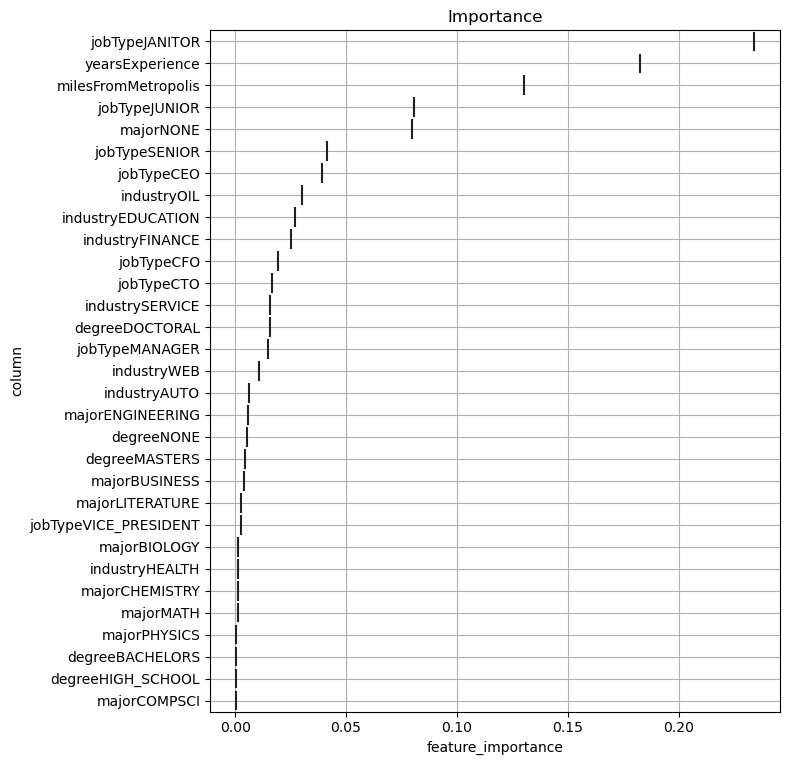

In [73]:
%%time
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Fit a Gradient Boosting Regressor model to the train dataset

# Instantiate the model
GBR = GradientBoostingRegressor(**{'n_estimators': 64, 'min_samples_split': 0.1, 'max_depth': 8.0, 'learning_rate': 0.25})


GBR.fit(X_train.iloc[1:50000], Y_train.iloc[1:50000])


# print score of the model
print_score(GBR)

# visualizing the inportance of features.
fig, ax = visualize_importance(GBR.feature_importances_, train_X.iloc[1:50000])



### Decision Tree Regrsessor

RMSE-Train: 35.16956286514486
RMSE-Test: 35.12702764451243
Score-Train: 0.166162299878873
Score-Test: 0.1677919449226326
MedAE-Train: 24.209131075110463
MedAE-Test: 24.209131075110463
MeanAE-Train: 28.288060871921683
MeanAE-Test: 28.26719899568176 

Wall time: 332 ms


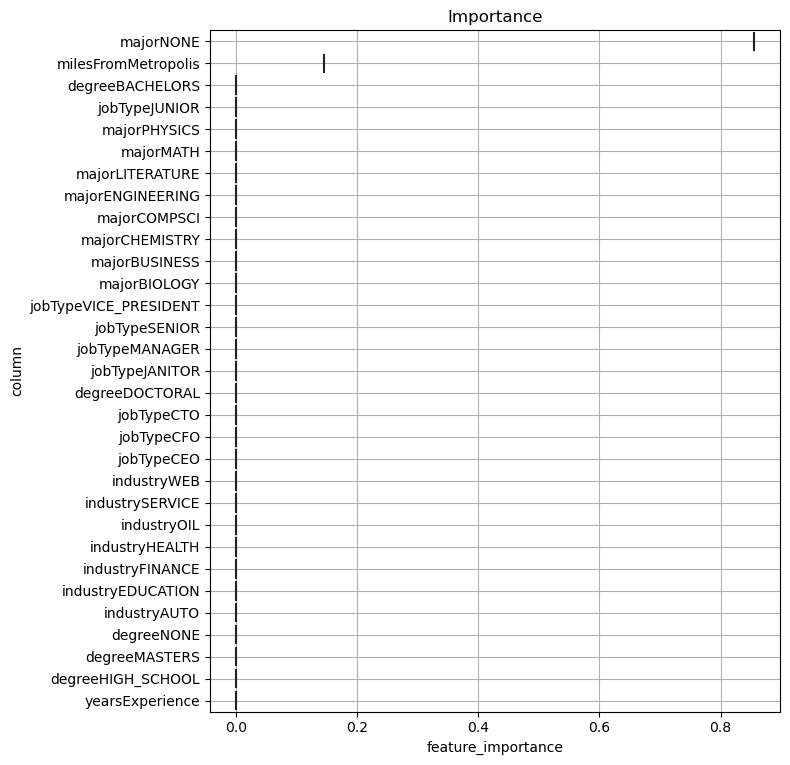

In [74]:
%%time
# Fit a Decision Tree Regressor model to the train dataset

# Instantiate the model
DTR = DecisionTreeRegressor(**{'splitter': 'random', 'min_weight_fraction_leaf': 0.2, 'min_samples_leaf': 0.2, 'max_features': None, 'max_depth': 20.0})



# Instantiate the model

DTR.fit(X_train.iloc[1:10000], Y_train.iloc[1:10000])

# print score of the model
print_score(DTR)

# visualizing the inportance of features.
fig, ax = visualize_importance(DTR.feature_importances_, train_X.iloc[1:10000])



### XGBoost Regressor

RMSE-Train: 19.34775658963725
RMSE-Test: 19.346327850489075
Score-Train: 0.7476468000536396
Score-Test: 0.7475669605347122
MedAE-Train: 13.53940200805664
MedAE-Test: 13.519329071044922
MeanAE-Train: 15.641906990094252
MeanAE-Test: 15.63408200418517 

Wall time: 859 ms


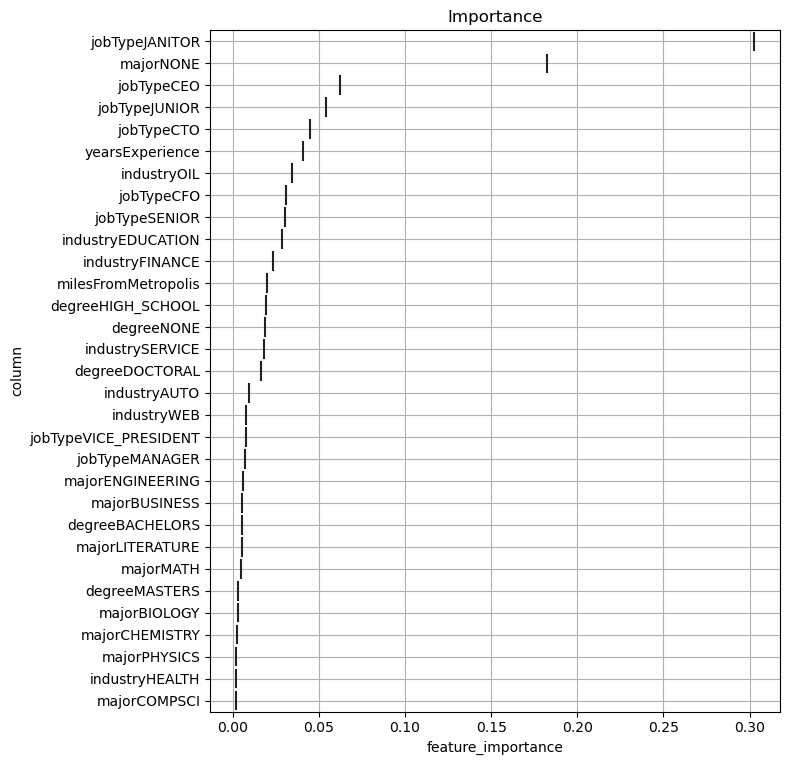

In [75]:
%%time
# Fit a XGB Regressor model to the train dataset

# Instantiate the model
xgbr = XGBRegressor(**{'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.15, 'gamma': 0.1, 'colsample_bytree': 0.4})



# Fit the model to the data
xgbr.fit(X_train.iloc[1:10000], Y_train.iloc[1:10000])


# print score of the model
print_score(xgbr)


# visualizing the inportance of features.
fig, ax = visualize_importance(xgbr.feature_importances_, train_X.iloc[1:10000])





## Comparing the metrics for tuned models

In [76]:
models= [DTR, rf,GBR, xgbr]
names = ['Dtree', 'Forest','GBR', 'Xboost']
comp_model_train,comp_model_test = compare_models(models,names,X_train,Y_train,X_test,Y_test)




In [77]:
print("Metrics on train data")
comp_model_train

Metrics on train data


,Metric,Dtree,Forest,GBR,Xboost
0,rmse,35.169563,29.989928,19.159436,19.347757
1,MedAE,24.209131,20.681636,13.507751,13.539402
2,MAE,28.288061,24.050005,15.534912,15.641907
3,R-squared,-3.876402,-0.500459,0.675176,0.659898


In [78]:
print("Metrics on test data")
comp_model_train

Metrics on test data


,Metric,Dtree,Forest,GBR,Xboost
0,rmse,35.169563,29.989928,19.159436,19.347757
1,MedAE,24.209131,20.681636,13.507751,13.539402
2,MAE,28.288061,24.050005,15.534912,15.641907
3,R-squared,-3.876402,-0.500459,0.675176,0.659898


### Now working with the test dataset provided

In [79]:
# test data 
test_X = test_data
test_X

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JUNIOR,NONE,NONE,AUTO,20,47
2,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44
...,...,...,...,...,...,...
999995,VICE_PRESIDENT,BACHELORS,MATH,OIL,14,3
999996,MANAGER,NONE,NONE,HEALTH,20,67
999997,JANITOR,NONE,NONE,OIL,1,91
999998,CTO,DOCTORAL,MATH,OIL,14,63


In [80]:
# passing test data for scaling
col_test = ['yearsExperience','milesFromMetropolis']
test_X = scale_data(test_X,col_test)



In [81]:
# passing test dataset for one hot encoding process
encoder = OneHotEncoder()
test_drop = test_X.drop(['jobType','degree','major','industry'],axis=1)
test_X = encoder.fit_transform(test_X.drop(['yearsExperience','milesFromMetropolis'],axis=1))

test_X =test_X.join(test_drop['yearsExperience']) 
test_X =test_X.join(test_drop['milesFromMetropolis'])  
test_X.head()



,jobTypeCEO,jobTypeCFO,jobTypeCTO,jobTypeJANITOR,jobTypeJUNIOR,jobTypeMANAGER,jobTypeSENIOR,jobTypeVICE_PRESIDENT,degreeBACHELORS,degreeDOCTORAL,...,majorPHYSICS,industryAUTO,industryEDUCATION,industryFINANCE,industryHEALTH,industryOIL,industrySERVICE,industryWEB,yearsExperience,milesFromMetropolis
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.916667,0.737374
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.833333,0.474747
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.708333,0.090909
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.583333,0.969697
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.416667,0.444444


In [82]:
# Perforn the prediction on the test dataset
y_predicted = GBR.predict(test_X)
y_predicted





array([105.89949384,  95.70473261, 179.11641405, ...,  52.20021055,
       165.38544715, 112.7218693 ])

In [83]:
# creating a dataframe of predicted results 
predictions = pd.DataFrame(y_predicted)



In [84]:
# predicted values in dataframe
predictions



,0
0,105.899494
1,95.704733
2,179.116414
3,104.154292
4,113.957991
...,...
999995,168.585446
999996,105.514875
999997,52.200211
999998,165.385447


**Example Problem:**

In [85]:
### we take same samples provided my the manager so that we can explain him the difference between the salary the person should be getting as the salary the person
sample = train_data.sample(100)
sample



,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
665414,CEO,HIGH_SCHOOL,NONE,FINANCE,0.250000,0.020202,168
527053,CTO,MASTERS,BIOLOGY,WEB,0.125000,0.010101,117
873718,CFO,DOCTORAL,BUSINESS,EDUCATION,0.500000,0.303030,141
607332,VICE_PRESIDENT,BACHELORS,PHYSICS,AUTO,0.916667,0.727273,106
847655,CTO,NONE,NONE,HEALTH,0.291667,0.232323,136
...,...,...,...,...,...,...,...
195050,CTO,MASTERS,PHYSICS,EDUCATION,0.500000,0.989899,101
861319,CFO,MASTERS,MATH,OIL,0.750000,0.959596,152
629712,VICE_PRESIDENT,BACHELORS,COMPSCI,SERVICE,1.000000,0.989899,126
136380,CFO,MASTERS,PHYSICS,WEB,0.041667,0.707071,104


In [86]:
train_cat = sample.iloc[:,0:4]   #categorical variables for sample

#encodind the samples
encoder = OneHotEncoder()
train_X = encoder.fit_transform(train_cat)

#processing the sample data
train = train_X.join(sample.iloc[:,4:])

#taking those samples whose salary is very less i.e the reason for employee resigning
sample = train[train['salary']<60]



#Preparing the x and y values
x_sample = sample.drop('salary',axis=1) 
y_sample = sample['salary']



# passing test data for scaling
col_test = ['yearsExperience','milesFromMetropolis']
sample_x = scale_data(x_sample,col_test)
sample_x



,jobTypeCEO,jobTypeCFO,jobTypeCTO,jobTypeJANITOR,jobTypeJUNIOR,jobTypeMANAGER,jobTypeSENIOR,jobTypeVICE_PRESIDENT,degreeBACHELORS,degreeDOCTORAL,...,majorPHYSICS,industryAUTO,industryEDUCATION,industryFINANCE,industryHEALTH,industryOIL,industrySERVICE,industryWEB,yearsExperience,milesFromMetropolis
858372,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.707692
432515,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.083333,0.338462
825149,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.400000
800009,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.166667,0.492308
923876,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083333,1.000000
970738,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.015385
867513,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.500000,0.861538
724274,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.166667,0.430769
109069,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.892308
223728,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.250000,0.000000


In [87]:
#predicting the sample
predicted_out = GBR.predict(sample_x)
predicted_out


array([42.1159029 , 47.50086532, 46.97120986, 44.68690753, 54.71804989,
       48.94068099, 43.97698971, 47.6101174 , 77.21287974, 72.85786777])

In [88]:
y_sample  #Real values

858372    47
432515    45
825149    38
800009    39
923876    58
970738    52
867513    49
724274    50
109069    53
223728    59
Name: salary, dtype: int64

### As we can see the difference in values.

**Example**: The last sample the real value is 59 but the model predicted it to be 72...This may be because the other competitors are offering him more as compared to the current salary..so he is leaving the company.

**Here, we can clearly see a difference between the real salary given to the employee and the predicted salary which may be the probable reason for the employee to leave the company**